# Data Cleansing
#### Author Name: Pouria Ebrahimnezhad

Date:16/05/2019

Environment: Python 3.6.5 and Jupyter notebook
Libraries used: 
* seaborn
* matplotlib
* datetime
* pandas
* numpy
* sklearn.linear_model


Other resources used to help the work include:
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6
* https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
* https://gist.github.com/sabit-zahin/4366d29eeb0230ecc4e65e4d666062d1
* https://onlinehelp.tableau.com/current/pro/desktop/en-us/maps_howto_simple.htm
* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/



# Introduction

There are three main sections to this assessment, detecting anomolies in data and cleaning the data, detecting outliers in the data and removing them from the data set and detecting missing values and imputing them with suitable value learnt from the relationships in the data set. I have carried out these tasks in each section seperatley and have documented all work below to clarify the approach and steps taken, this notebook should be accompanied by three input files and two csv files created from my work in Tableau in order to run. also please note the Dijkstra section needs to be run before the rest of the code is executed.

# Section 1 - Detect and fix errors in dirty data

In [2]:
# Importing libraries for EDA
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
%matplotlib inline

In [3]:
# reading the file
data = pd.read_csv('30035678_dirty_data.csv')
data.shape

(325, 14)

In [4]:
data.head(10)

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5377894413,2,7,8,-37.861835,144.905716,-37.807202,145.026637,13992.0,2018-06-07,05:15:28,4292.40,6:27:00,284.89
1,ID3620970128,1,3,1,-37.809416,144.989454,-37.802575,144.963270,2765.1,2018-04-27,20:20:59,703.38,20:32:42,11.27
2,ID1484350483,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51069.3,2018-02-01,06:00:42,12976.50,9:36:58,27.89
3,ID5975229564,2,6,8,-37.787442,144.980409,-37.807202,145.026637,5789.0,2018-01-04,04:47:50,1492.68,5:12:42,118.25
4,ID3313658785,1,3,8,-37.822089,144.969470,-37.815834,145.046450,7925.0,2018-03-28,23:41:07,2356.08,0:20:23,25.31
5,ID1805314245,0,5,9,-37.809216,144.937202,-38.110916,144.654173,42982.0,2018-04-03,23:05:46,10286.70,1:57:12,30.41
6,ID1303615241,0,5,4,-37.804804,144.924486,-37.799570,145.010850,8500.0,2018-05-25,07:06:37,2273.58,7:44:30,7.35
7,ID1484910345,0,3,6,-37.823284,144.970019,-37.787433,144.980377,4545.0,2018-04-15,18:05:54,1132.80,18:24:46,12.23
8,ID3559388277,1,1,6,-37.808188,144.960027,-37.787433,144.980377,3632.9,2018-06-21,21:31:17,919.38,21:46:36,18.85
9,ID3804357375,1,6,9,-37.787433,144.980377,-38.110916,144.654173,47033.0,2018-06-07,00:00:42,11350.50,3:09:52,55.63


In [5]:
# Here I fix the ID column header to something more suitable 
data.rename(columns={"Unnamed: 0":"ID"},inplace=True)

In [6]:
# lets have a look at what the data looks like statistically 
data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.812308,5.116923,5.009231,-36.673576,144.940049,-36.684514,144.930986,15680.668308,4103.202831,67.797877
std,0.800368,2.494164,2.596872,9.348022,0.099944,9.333555,0.108005,16483.539495,3990.076254,143.482926
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1271.000000,315.000000,4.460000
25%,0.000000,3.000000,3.000000,-37.824155,144.928748,-37.824145,144.926977,5171.000000,1346.220000,13.610000
50%,1.000000,5.000000,5.000000,-37.814232,144.961790,-37.815083,144.954684,8748.000000,2666.100000,20.850000
75%,1.000000,7.000000,7.000000,-37.804376,144.993055,-37.805941,144.987960,13986.000000,4292.400000,43.550000
max,3.000000,9.000000,9.000000,38.110916,145.046450,38.110916,145.046450,51069.300000,13204.980000,806.760000


In [7]:
# Now I have a look at what the column types are, this way I get to make sure the categorical column types are correct
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 14 columns):
ID                       325 non-null object
Uber Type                325 non-null int64
Origin Region            325 non-null int64
Destination Region       325 non-null int64
Origin Latitude          325 non-null float64
Origin Longitude         325 non-null float64
Destination Latitude     325 non-null float64
Destination Longitude    325 non-null float64
Journey Distance(m)      325 non-null float64
Departure Date           325 non-null object
Departure Time           325 non-null object
Travel Time(s)           325 non-null float64
Arrival Time             325 non-null object
Fare$                    325 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 35.6+ KB


In [8]:
# from above we see that some of our categorical columns are infact of type int which makes it difficult to explore
data_new = data.copy()
data_new[["Uber Type","Origin Region","Destination Region"]] = data_new[["Uber Type","Origin Region","Destination Region"]].astype('object')
data_new.dtypes

ID                        object
Uber Type                 object
Origin Region             object
Destination Region        object
Origin Latitude          float64
Origin Longitude         float64
Destination Latitude     float64
Destination Longitude    float64
Journey Distance(m)      float64
Departure Date            object
Departure Time            object
Travel Time(s)           float64
Arrival Time              object
Fare$                    float64
dtype: object

In [9]:
# Now we can see a more meaningful view of the categorical data using below describe method
data_new.describe(include=['O'])

,ID,Uber Type,Origin Region,Destination Region,Departure Date,Departure Time,Arrival Time
count,325,325,325,325,325,325,325
unique,325,4,9,9,161,324,325
top,ID1997065951,0,7,3,2018-02-22,17:18:10,17:25:06
freq,1,135,44,42,5,2,1


In [10]:
# and we can still use the original DF to view the statistical information
data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.812308,5.116923,5.009231,-36.673576,144.940049,-36.684514,144.930986,15680.668308,4103.202831,67.797877
std,0.800368,2.494164,2.596872,9.348022,0.099944,9.333555,0.108005,16483.539495,3990.076254,143.482926
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1271.000000,315.000000,4.460000
25%,0.000000,3.000000,3.000000,-37.824155,144.928748,-37.824145,144.926977,5171.000000,1346.220000,13.610000
50%,1.000000,5.000000,5.000000,-37.814232,144.961790,-37.815083,144.954684,8748.000000,2666.100000,20.850000
75%,1.000000,7.000000,7.000000,-37.804376,144.993055,-37.805941,144.987960,13986.000000,4292.400000,43.550000
max,3.000000,9.000000,9.000000,38.110916,145.046450,38.110916,145.046450,51069.300000,13204.980000,806.760000


## 1.1 Positive Values for Latitude

we can instantly see there is something fishy with the Origin and Destination latiude the max value for our data is positive value ??
the value it self is similar to the minimum value for that column but positive could it be mistake we have to check possibily against the region limits.
but first lets check if there are other positive Latitude in our data set for the latitude column

In [11]:
# finding incorrect Origin Latitude rows
data_new[data_new["Origin Latitude"] > 0]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
46,ID5988950225,2,9,3,38.110916,144.654173,-37.816200,145.001961,47056.0,2018-03-28,02:40:35,11318.40,5:49:13,702.60
47,ID1792811306,0,9,5,38.110916,144.654173,-37.808882,144.928334,44059.0,2018-03-01,00:23:09,10583.34,3:19:32,32.61
48,ID3677987915,1,1,9,37.816740,144.960251,-38.110916,144.654173,43152.0,2018-06-01,15:53:49,10389.18,18:46:58,46.29
50,ID5143371557,2,4,5,37.811866,145.013041,-37.809521,144.936917,7075.0,2018-06-03,20:56:15,1790.76,21:26:05,134.91
52,ID1452825885,0,9,1,38.110916,144.654173,-37.808092,144.975812,44777.0,2018-06-16,01:26:36,10816.62,4:26:52,35.90


In [12]:
# finding incorrect Destination Latitude rows
data_new[data_new["Destination Latitude"] > 0]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
59,ID3788649317,1,2,6,-37.820561,144.948789,37.773803,144.983647,9690.0,2018-02-19,16:07:12,2940.90,16:56:12,19.22
60,ID5567571730,2,9,8,-38.110916,144.654173,37.815834,145.046450,51032.0,2018-07-01,05:21:42,12681.06,8:53:03,791.68
61,ID1549901591,0,2,9,-37.823457,144.935857,38.110916,144.654173,43283.0,2018-05-02,04:37:09,10461.24,7:31:30,31.60
63,ID1980268568,0,8,4,-37.815834,145.046450,37.808194,144.999863,4393.0,2018-03-03,11:53:18,1404.36,12:16:42,10.05
64,ID1148980304,0,3,8,-37.823384,144.970383,37.815834,145.046450,7957.0,2018-07-09,00:07:11,2286.54,0:45:17,15.96


We now know that we have 5 rows which the Origin Latitude is incorrect. Also 5 rows that the Destination Latitude is incorrect.

in order to correct them we need to understand these values for the same regions to make a decision on how best to deal with them

In [13]:
data_new.groupby("Origin Region").describe()

Origin Latitude                                              \
                        count       mean        std        min        25%   
Origin Region                                                               
1                        30.0 -35.288849  13.807442 -37.821504 -37.814059   
2                        34.0 -37.819240   0.004083 -37.825531 -37.822909   
3                        35.0 -37.818940   0.004503 -37.824700 -37.823334   
4                        38.0 -35.816605  12.266930 -37.816218 -37.811113   
5                        34.0 -37.804376   0.005897 -37.816143 -37.807685   
6                        40.0 -37.783342   0.007588 -37.790818 -37.790797   
7                        44.0 -37.860429   0.009324 -37.861835 -37.861835   
8                        40.0 -37.812381   0.004283 -37.815834 -37.815834   
9                        30.0 -30.488732  23.257459 -38.110916 -38.110916   

                                               Origin Longitude              \
                     50%        75%        max            count        mean   
Origin Region                                                                 
1             -37.808221 -37.804810  37.816740             30.0  144.954575   
2             -37.819567 -37.815711 -37.812454             34.0  144.941206   
3             -37.818723 -37.815894 -37.809416             35.0  144.984665   
4             -37.809223 -37.800618  37.811866             38.0  145.003942   
5             -37.804761 -37.800362 -37.788265             34.0  144.936175   
6             -37.787433 -37.773845 -37.773803             40.0  144.983255   
7             -37.861835 -37.861835 -37.799989             44.0  144.907685   
8             -37.815834 -37.807202 -37.807202             40.0  145.038525   
9             -38.110916 -38.110916  38.110916             30.0  144.654173   

               ... Travel Time(s)           Fare$                          \
               ...            75%       max count        mean         std   
Origin Region  ...                                                          
1              ...       1570.080  10826.94  30.0   49.482000  124.253650   
2              ...       3150.405  10461.24  34.0   51.098529   62.622386   
3              ...       2938.110  10917.24  35.0   32.485714   40.680791   
4              ...       2394.345  11822.10  38.0   51.975263  117.016535   
5              ...       3526.395  12681.06  34.0   46.030588  113.267133   
6              ...       3953.595  12976.50  40.0   57.954250  121.590688   
7              ...       4292.400  13173.36  44.0   54.223409   83.023117   
8              ...       4917.480  12681.06  40.0   67.810000  129.699573   
9              ...      12506.115  13204.98  30.0  223.966667  307.682735   

                                                         
                 min      25%     50%       75%     max  
Origin Region                                            
1               4.53  12.3100  14.970   20.1925  672.73  
2               4.82  13.6850  20.105   86.3525  213.20  
3               4.46  12.6100  18.290   28.1800  214.37  
4               4.70  13.2725  19.065   32.8375  717.34  
5               7.35  11.5025  18.235   30.8900  671.31  
6               5.60  13.3850  20.295   29.6325  706.11  
7               8.58  17.8700  20.925   29.8225  328.20  
8               9.20  15.6425  21.060   57.9675  783.93  
9              26.82  33.1250  51.820  498.8100  806.76  

[9 rows x 56 columns]

from above view we can see that the std_dev for zonez 1,4 and 9 is abnormally high which is a giveaway of the issue we spotted and also seems to match with the regions from the 5 rows that have a positive value for Origin latitude.

Next we look at each of these Region in isolation to see how the values look like for lat and long

In [14]:
data_new[data_new["Origin Region"]==1].describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,-35.288849,144.954575,-37.829988,144.943661,7225.230000,1887.439333,49.48200
std,13.807442,0.010950,0.079743,0.085964,10258.424333,2506.797231,124.25365
min,-37.821504,144.933380,-38.110916,144.654173,1271.000000,315.000000,4.53000
25%,-37.814059,144.945743,-37.821357,144.929485,2559.250000,738.015000,12.31000
50%,-37.808221,144.958117,-37.811215,144.972065,4799.500000,1145.060000,14.97000
75%,-37.804810,144.962837,-37.791984,144.985620,6474.250000,1570.080000,20.19250
max,37.816740,144.975412,-37.773803,145.026637,44574.000000,10826.940000,672.73000


Lets also plot the lat and long to see what it looks like

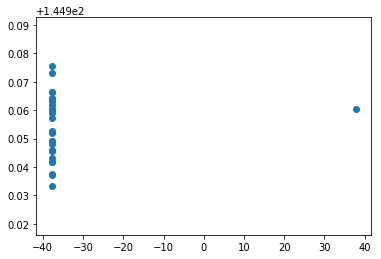

In [15]:
Oregion_1 = data_new[data_new["Origin Region"]==1]
plt.scatter(Oregion_1['Origin Latitude'], Oregion_1['Origin Longitude'])

In [16]:
data_new[data_new["Origin Region"]==4].describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-35.816605,145.003942,-37.851610,144.920827,11387.842105,2884.610526,51.975263
std,12.266930,0.014440,0.103965,0.110755,14878.569914,3591.572695,117.016535
min,-37.816218,144.927660,-38.110916,144.654173,1940.000000,457.860000,4.700000
25%,-37.811113,145.000448,-37.819953,144.927702,3805.500000,984.525000,13.272500
50%,-37.809223,145.005818,-37.814570,144.944964,5955.000000,1512.000000,19.065000
75%,-37.800618,145.012289,-37.807202,144.979784,9159.750000,2394.345000,32.837500
max,37.811866,145.015575,-37.773845,145.046450,48745.000000,11822.100000,717.340000


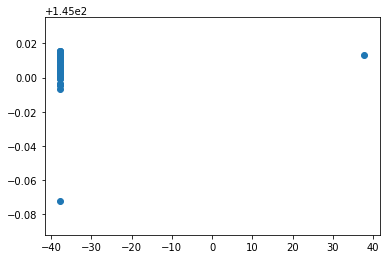

In [17]:
Oregion_4 = data_new[data_new["Origin Region"]==4]
plt.scatter(Oregion_4['Origin Latitude'], Oregion_4['Origin Longitude'])

Same thing for this region except we have stumbled on an outlier for longitude for this region, but we fix this in it's own place

In [18]:
data_new[data_new["Origin Region"]==9].describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-30.488732,1.446542e+02,-35.294035,144.965044,46473.800000,11372.754667,223.966667
std,23.257459,5.781517e-14,13.808265,0.042155,3190.907745,1055.373720,307.682735
min,-38.110916,1.446542e+02,-37.861835,144.905716,42217.000000,10155.960000,26.820000
25%,-38.110916,1.446542e+02,-37.823341,144.932347,43936.000000,10585.605000,33.125000
50%,-38.110916,1.446542e+02,-37.812180,144.966782,45205.000000,10871.160000,51.820000
75%,-38.110916,1.446542e+02,-37.804891,144.989208,50460.250000,12506.115000,498.810000
max,38.110916,1.446542e+02,37.815834,145.046450,51061.000000,13204.980000,806.760000


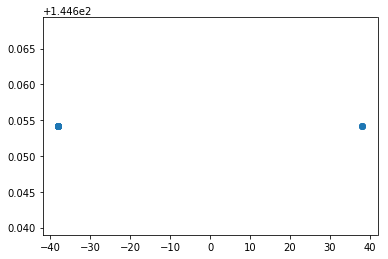

In [19]:
Oregion_9 = data_new[data_new["Origin Region"]==9]
plt.scatter(Oregion_9['Origin Latitude'], Oregion_9['Origin Longitude'])

for this region all points seem to correspond to one location only except the three rows which spotted earlier they also have the same value but only positive. one way to check that our guess is a good guess is to check this region in the data when it is the destination...

In [20]:
Dregion_9 = data_new[data_new["Destination Region"]==9]
Dregion_9.describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000,38.000000
mean,-35.822964,144.974617,-36.105078,1.446542e+02,47342.639474,11606.703158,126.709474
std,12.268822,0.045607,12.364814,2.880323e-14,3027.709511,1002.045609,230.907068
min,-37.861835,144.905716,-38.110916,1.446542e+02,42334.000000,10168.260000,22.070000
25%,-37.817367,144.936080,-38.110916,1.446542e+02,44549.250000,10766.145000,31.435000
50%,-37.810187,144.980377,-38.110916,1.446542e+02,47113.000000,11384.730000,35.450000
75%,-37.796930,145.012179,-38.110916,1.446542e+02,50797.000000,12681.060000,52.690000
max,37.816740,145.046450,38.110916,1.446542e+02,51069.300000,13173.360000,783.930000


We Know from the specifications that the nodes.csv file contains the location information.

We can also see that this location is consistent when it is in the Destination, so replacing the incorrect values for this region with the negative value is a good option. but we can check this against the nodes file as well just to make sure

Checking the other rows for positive values in their origin latitude for regions 1 and 4 also seem to show that replacing the value with it's negative could be a good option as the values are within the range of the rest of the data

In [21]:
# reading the source file for lat and long and checking the consistency of our values
nodes = pd.read_csv('nodes.csv')
nodes.describe()

,Unnamed: 0,lat,lon
count,1.711700e+04,17117.000000,17117.000000
mean,2.023147e+09,-37.812451,144.966743
std,1.978621e+09,0.008005,0.021438
min,2.157811e+07,-38.110916,144.654173
25%,4.888793e+08,-37.818766,144.951965
50%,8.465677e+08,-37.812767,144.964104
75%,3.215192e+09,-37.806185,144.981581
max,6.282174e+09,-37.739636,145.046450


In [22]:
data_new[data_new["Origin Latitude"] > 0]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
46,ID5988950225,2,9,3,38.110916,144.654173,-37.816200,145.001961,47056.0,2018-03-28,02:40:35,11318.40,5:49:13,702.60
47,ID1792811306,0,9,5,38.110916,144.654173,-37.808882,144.928334,44059.0,2018-03-01,00:23:09,10583.34,3:19:32,32.61
48,ID3677987915,1,1,9,37.816740,144.960251,-38.110916,144.654173,43152.0,2018-06-01,15:53:49,10389.18,18:46:58,46.29
50,ID5143371557,2,4,5,37.811866,145.013041,-37.809521,144.936917,7075.0,2018-06-03,20:56:15,1790.76,21:26:05,134.91
52,ID1452825885,0,9,1,38.110916,144.654173,-37.808092,144.975812,44777.0,2018-06-16,01:26:36,10816.62,4:26:52,35.90


In [23]:
# using the nodes file to check some of the above anomolies and find the correct values
print(nodes[nodes["lon"]==data_new[data_new['ID']=='ID5988950225']['Origin Longitude'].values[0]]['lat'].values[0])
print(nodes[nodes["lon"]==data_new[data_new['ID']=='ID3677987915']['Origin Longitude'].values[0]]['lat'].values[0])
print(nodes[nodes["lon"]==data_new[data_new['ID']=='ID5143371557']['Origin Longitude'].values[0]]['lat'].values[0])

-38.1109156
-37.816739500000004
-37.811865999999995


Checking the values above we can say with confidence that the anomoly can be fixed by using the negative values 

In [24]:
data_new.loc[data_new["Origin Latitude"] > 0, ["Origin Latitude"]] = 0 - (data_new.loc[data_new["Origin Latitude"] > 0, ["Origin Latitude"]].values)

Check if the issue has been remediated and no more positive values for the Origin Latitude

In [25]:
data_new[data_new["Origin Latitude"] > 0]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


In [26]:
data_new.describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,-37.842569,144.940049,-36.684514,144.930986,15680.668308,4103.202831,67.797877
std,0.088379,0.099944,9.333555,0.108005,16483.539495,3990.076254,143.482926
min,-38.110916,144.654173,-38.110916,144.654173,1271.000000,315.000000,4.460000
25%,-37.824379,144.928748,-37.824145,144.926977,5171.000000,1346.220000,13.610000
50%,-37.815245,144.961790,-37.815083,144.954684,8748.000000,2666.100000,20.850000
75%,-37.804762,144.993055,-37.805941,144.987960,13986.000000,4292.400000,43.550000
max,-37.773803,145.046450,38.110916,145.046450,51069.300000,13204.980000,806.760000


We now change focus to the Destination latitude issue we spotte earlier

In [27]:
data_new[data_new["Destination Latitude"] > 0]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
59,ID3788649317,1,2,6,-37.820561,144.948789,37.773803,144.983647,9690.0,2018-02-19,16:07:12,2940.90,16:56:12,19.22
60,ID5567571730,2,9,8,-38.110916,144.654173,37.815834,145.046450,51032.0,2018-07-01,05:21:42,12681.06,8:53:03,791.68
61,ID1549901591,0,2,9,-37.823457,144.935857,38.110916,144.654173,43283.0,2018-05-02,04:37:09,10461.24,7:31:30,31.60
63,ID1980268568,0,8,4,-37.815834,145.046450,37.808194,144.999863,4393.0,2018-03-03,11:53:18,1404.36,12:16:42,10.05
64,ID1148980304,0,3,8,-37.823384,144.970383,37.815834,145.046450,7957.0,2018-07-09,00:07:11,2286.54,0:45:17,15.96


We can see the issue is for Destination Region 4,6,8 and 9, we follow the same approach

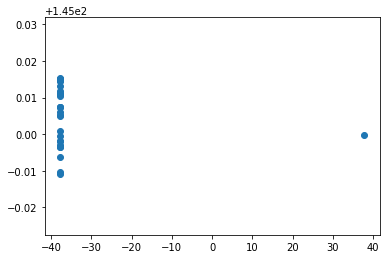

In [28]:
Dregion_4 = data_new[data_new["Destination Region"]==4]
plt.scatter(Dregion_4['Destination Latitude'], Dregion_4['Destination Longitude'])

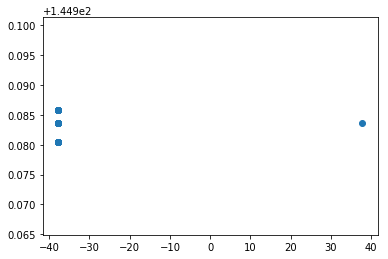

In [29]:
Dregion_6 = data_new[data_new["Destination Region"]==6]
plt.scatter(Dregion_6['Destination Latitude'], Dregion_6['Destination Longitude'])

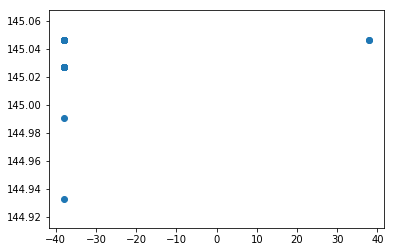

In [30]:
Dregion_8 = data_new[data_new["Destination Region"]==8]
plt.scatter(Dregion_8['Destination Latitude'], Dregion_8['Destination Longitude'])

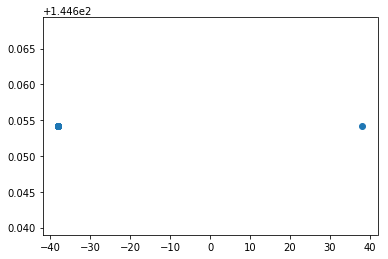

In [31]:
Dregion_9 = data_new[data_new["Destination Region"]==9]
plt.scatter(Dregion_9['Destination Latitude'], Dregion_9['Destination Longitude'])

Same approach as before we substitute these values with the negative of each one

In [32]:
data_new.loc[data_new["Destination Latitude"] > 0, ["Destination Latitude"]] = 0 - (data_new.loc[data_new["Destination Latitude"] > 0, ["Destination Latitude"]].values)

one more time we check to see the effectivness of the last change

In [33]:
data_new[data_new["Destination Latitude"] > 0]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


In [34]:
data_new.describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,-37.842569,144.940049,-37.849588,144.930986,15680.668308,4103.202831,67.797877
std,0.088379,0.099944,0.097277,0.108005,16483.539495,3990.076254,143.482926
min,-38.110916,144.654173,-38.110916,144.654173,1271.000000,315.000000,4.460000
25%,-37.824379,144.928748,-37.824198,144.926977,5171.000000,1346.220000,13.610000
50%,-37.815245,144.961790,-37.815400,144.954684,8748.000000,2666.100000,20.850000
75%,-37.804762,144.993055,-37.806727,144.987960,13986.000000,4292.400000,43.550000
max,-37.773803,145.046450,-37.773803,145.046450,51069.300000,13204.980000,806.760000


## 1.2 Checking lat & long consistency

Here I check if all Lat and Lon figures are consistent with respect to the nodes.csv file provided.

In [35]:
Orlat_list = list(data_new["Origin Latitude"].values)
Orlon_list = list(data_new["Origin Longitude"].values)
Deslat_list = list(data_new["Destination Latitude"].values)
Deslon_list = list(data_new["Destination Longitude"].values)

In [36]:
count_orlat = 0
for each in Orlat_list:
    if each in nodes["lat"].values:
        count_orlat +=1
count_orlon = 0
for each in Orlon_list:
    if each in nodes["lon"].values:
        count_orlon +=1
count_deslat = 0
for each in Deslat_list:
    if each in nodes["lat"].values:
        count_deslat +=1
count_deslon = 0
for each in Deslon_list:
    if each in nodes["lon"].values:
        count_deslon +=1
if count_orlat ==count_orlon==count_deslat==count_deslon==325:
    print("All location data consistent with nodes file")
else:
    print("Check each count seperate")

All location data consistent with nodes file


## 1.3 Checking consistency of locations per Region

Now we want to check the consistency of the Longitude value per Origin region, This time we use some visualisation to view any inconsistencies

In [37]:
or_df = data_new.groupby("Origin Region")

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
8        AxesSubplot(0.382353,0.15;0.235294x0.220588)
9        AxesSubplot(0.664706,0.15;0.235294x0.220588)
dtype: object

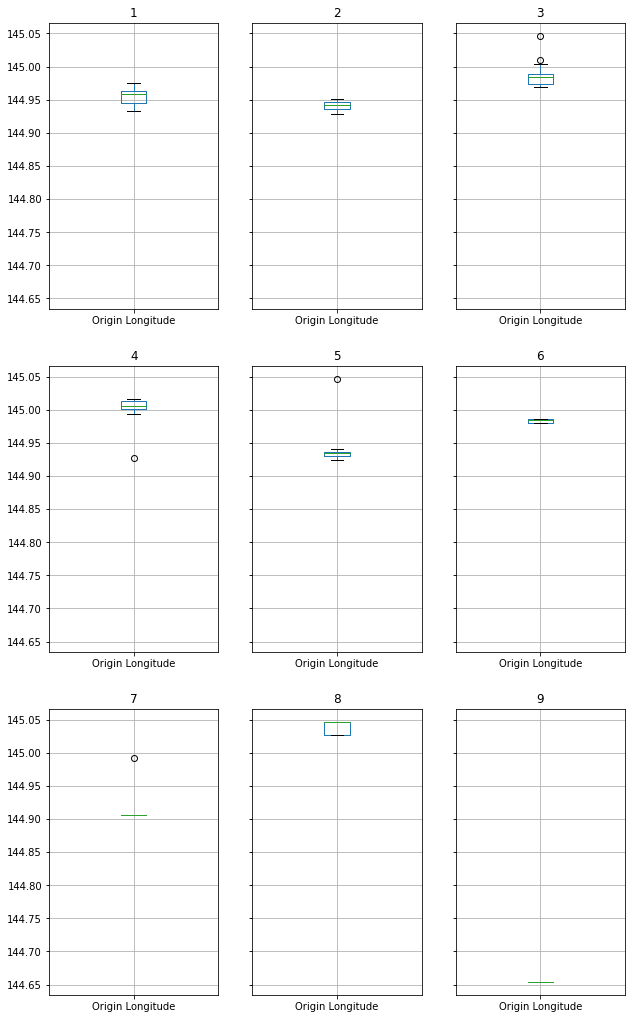

In [38]:
or_df.boxplot(column="Origin Longitude", figsize=(10,18))

We need to take a closer look at regions 3, 4, 5, 7 and 9 to see what is going on as they are some outliers here, could be just some of these regions have points further away in longitude from the rest of the points

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE2537A0F0>]],
      dtype=object)

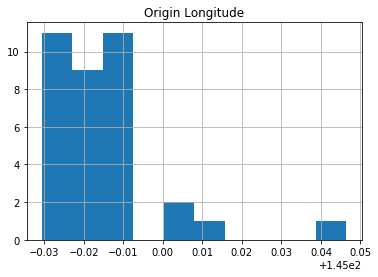

In [39]:
or_df.get_group(3).hist("Origin Longitude")

In [40]:
# Checking Region 3 outlier for consistency with nodes file
filt = or_df.get_group(3)["Origin Longitude"].max()
or_df.get_group(3)[or_df.get_group(3)["Origin Longitude"] == filt]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
29,ID1900132528,0,3,5,-37.815834,145.04645,-37.812655,144.925244,11257.0,2018-07-15,23:08:20,3172.2,0:01:12,21.2


In [41]:
# using the ID from above
nodes[nodes["lon"]==data_new[data_new['ID']=='ID1900132528']['Origin Longitude'].values[0]]['lat'].values[0]

-37.8158343

We can see consistent location with nodes file so no issues here interms of syntactics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE2568A208>]],
      dtype=object)

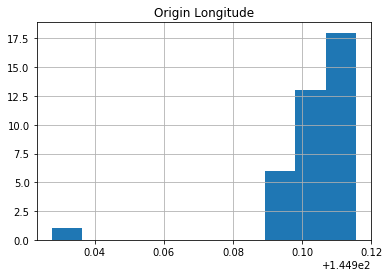

In [42]:
# check for region 4
or_df.get_group(4).hist("Origin Longitude")

In [43]:
filt = or_df.get_group(4)["Origin Longitude"].min()
or_df.get_group(4)[or_df.get_group(4)["Origin Longitude"] == filt]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
28,ID3600347120,1,4,2,-37.815245,144.92766,-37.8154,144.937838,1940.0,2018-01-02,13:36:24,476.7,13:44:20,10.63


In [44]:
# using the ID from above
nodes[nodes["lon"]==data_new[data_new['ID']=='ID3600347120']['Origin Longitude'].values[0]]['lat'].values[0]

-37.815244799999995

Again we can see consistent location with nodes file so no issues here syntacticly, possibly just a far point for this region

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE25680BA8>]],
      dtype=object)

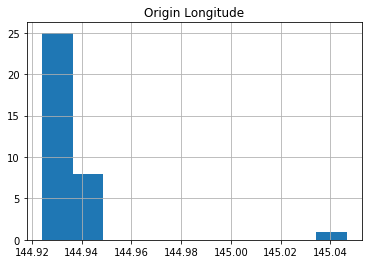

In [45]:
# Checking Region 5
or_df.get_group(5).hist("Origin Longitude")

In [46]:
filt = or_df.get_group(5)["Origin Longitude"].max()
or_df.get_group(5)[or_df.get_group(5)["Origin Longitude"] == filt]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
24,ID1222900173,0,5,9,-37.815834,145.04645,-38.110916,144.654173,51032.0,2018-06-20,01:46:43,12681.06,5:18:04,36.63


Here we spot an issue, it seems that this location for Origin region 5 also appears in Origin Region 3 ??? Could this be a Semantic Anomaly meaning the location resides in 2 or more regions ??? This needs further exploring...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE257605C0>]],
      dtype=object)

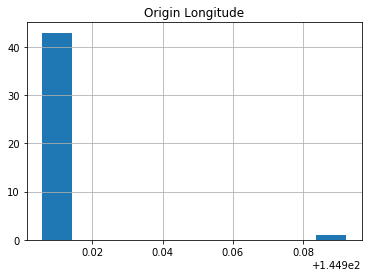

In [47]:
or_df.get_group(7).hist("Origin Longitude")

In [48]:
filt = or_df.get_group(7)["Origin Longitude"].max()
or_df.get_group(7)[or_df.get_group(7)["Origin Longitude"] == filt]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
15,ID1565741586,0,7,3,-37.799989,144.992333,-37.821319,144.990853,2599.0,2018-07-17,15:19:01,657.6,15:29:58,8.58


In [49]:
# using the ID from above to check consistency against the node file
nodes[nodes["lon"]==data_new[data_new['ID']=='ID1565741586']['Origin Longitude'].values[0]]['lat'].values[0]

-37.799988799999994

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE257D3F28>]],
      dtype=object)

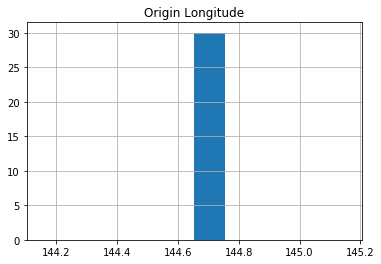

In [50]:
or_df.get_group(9).hist("Origin Longitude")

All values seem to correspond to one location for this Region same as before

Here I do the same for Destination Region Longitude, to check for any abnormalities

In [51]:
des_df = data_new.groupby("Destination Region")

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
8        AxesSubplot(0.382353,0.15;0.235294x0.220588)
9        AxesSubplot(0.664706,0.15;0.235294x0.220588)
dtype: object

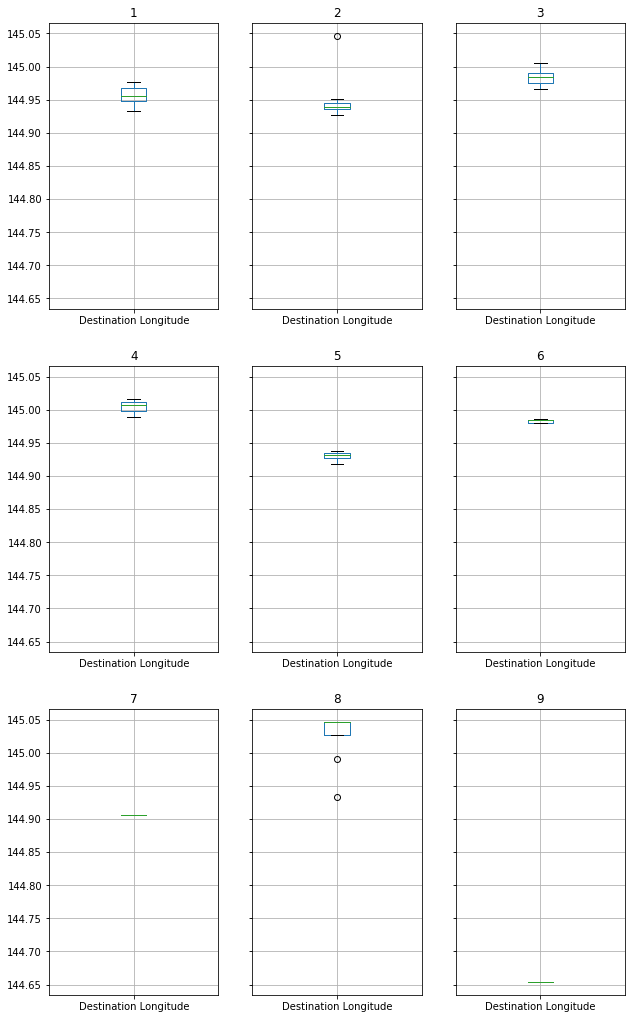

In [52]:
des_df.boxplot(column="Destination Longitude", figsize=(10,18))

From the above plots we can see there are two Regions worth looking into, Regions 2 and 8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE27398550>]],
      dtype=object)

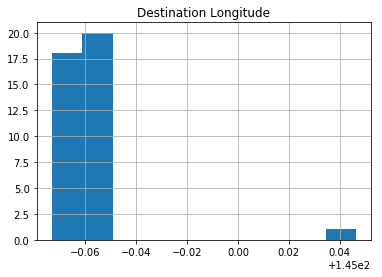

In [53]:
# checking region 2
des_df.get_group(2).hist("Destination Longitude")

In [54]:
filt = des_df.get_group(2)["Destination Longitude"].max()
des_df.get_group(2)[des_df.get_group(2)["Destination Longitude"] == filt]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
38,ID1666091188,0,6,2,-37.773803,144.983647,-37.815834,145.04645,13562.0,2018-06-14,09:56:50,4213.56,11:07:03,11.45


In [55]:
# using the ID from above to check consistency against the node file
nodes[nodes["lon"]==data_new[data_new['ID']=='ID1666091188']['Destination Longitude'].values[0]]['lat'].values[0]

-37.8158343

We see consistency with the location file but again we see that this location from region 2 seems to appear in another region, region 5, this seems a Semantic issue which we need to explore further in the next section

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE27440588>]],
      dtype=object)

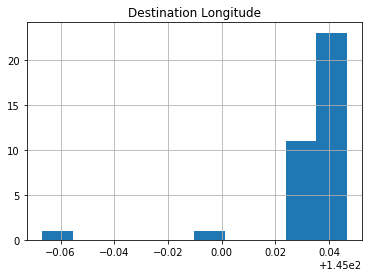

In [56]:
# Checking Region 8
des_df.get_group(8).hist("Destination Longitude")

Here I see 2 points with longitude is far from the rest lets use a quantile function to look in to them further. Please note I have adopted this method from a blog in Stack over flow:
https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

In [57]:
# obtaining the 25% quantile threshold
q = des_df.get_group(8)["Destination Longitude"].quantile(0.25)
des_df.get_group(8)[des_df.get_group(8)["Destination Longitude"] < q]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
36,ID3475883018,1,9,8,-38.110916,144.654173,-37.832651,144.990347,46542.0,2018-04-09,23:02:21,11211.30,2:09:12,56.55
41,ID1929513987,0,3,8,-37.814232,144.972816,-37.805624,144.933171,4535.0,2018-01-26,11:01:57,1191.36,11:21:48,4.46


In [58]:
# using the IDs from above to check consistency against the node file
print(nodes[nodes["lon"]==data_new[data_new['ID']=='ID3475883018']['Destination Longitude'].values[0]]['lat'].values[0])
print(nodes[nodes["lon"]==data_new[data_new['ID']=='ID1929513987']['Destination Longitude'].values[0]]['lat'].values[0])

-37.83265120000001
-37.805623700000005


We can see the latitudes for these locations are consistent against the node file

## 1.4 Date Format

Here we check the Date format to make sure Dates don't have any Sytactical error. In-order to do this I use a Regex for date in the format required to check consistency

In [60]:
import re
Regex = r"(\d{4}\-(?:0[1-9]|1[012])\-(?:0[1-9]|[12][0-9]|3[01]))"
dep_date = list(data_new["Departure Date"].values)
correct = []
wrong = []
for i in range(0, len(dep_date)):
    if re.findall(Regex, dep_date[i]) != []:
        correct.append(re.findall(Regex, dep_date[i]))
    else:
        wrong.append(dep_date[i])
print(len(correct))
print(len(wrong))

320
5


In [61]:
data_new[data_new['Departure Date'].isin(wrong)]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
215,ID1733463517,0,4,8,-37.798961,145.010999,-37.807202,145.026637,2289.0,2018-16-07,12:44:06,575.28,12:53:41,8.48
218,ID3306706245,1,4,6,-37.799398,144.999780,-37.787442,144.980409,3360.0,2018-17-02,05:23:09,866.34,5:37:35,22.10
219,ID1353231393,0,8,3,-37.815834,145.046450,-37.821258,145.005661,4704.0,2018-22-06,23:11:07,1507.80,23:36:14,14.72
225,ID1759690194,0,4,6,-37.799602,144.995379,-37.790797,144.985865,1961.0,2018-20-03,19:12:40,587.88,19:22:27,11.63
236,ID3879504509,1,3,7,-37.811763,144.985371,-37.861835,144.905716,9562.0,2018-18-07,00:04:06,3235.14,0:58:01,25.75


This may be due to the fact that the month and date have been misplaced, Its safe option to change them according to this assumption as we don't have any other date information to compare to

In [62]:
data_new.iloc[215,9] = '2018-07-16'
data_new.iloc[218,9] = '2018-02-17'
data_new.iloc[219,9] = '2018-06-22'
data_new.iloc[225,9] = '2018-03-20'
data_new.iloc[236,9] = '2018-07-18'

Now I check for any other invalid dates

In [63]:
invalid_dates = ['2018-02-29', '2018-02-30', '2018-02-31', '2018-04-31', '2018-06-31', '2018-09-31', '2018-11-31']

In [64]:
data_new[data_new['Departure Date'].isin(invalid_dates)]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
239,ID3261771129,1,3,7,-37.824544,144.988898,-37.861835,144.905716,9225.0,2018-06-31,19:56:49,3028.26,20:47:17,24.14
243,ID3613735420,1,9,4,-38.110916,144.654173,-37.815846,145.015418,49450.0,2018-04-31,02:20:10,11981.28,5:39:51,62.10
245,ID5554846859,2,6,8,-37.790818,144.985793,-37.807202,145.026637,4835.0,2018-04-31,04:43:03,1248.96,5:03:51,103.40
248,ID3810796722,1,7,2,-37.861835,144.905716,-37.814754,144.937699,10356.0,2018-02-30,06:56:05,3401.88,7:52:46,17.34
251,ID3679693274,1,2,5,-37.824379,144.944188,-37.806727,144.937972,2806.0,2018-06-31,03:41:06,705.36,3:52:51,16.30
252,ID1529355527,0,5,6,-37.799655,144.937124,-37.790797,144.985865,7561.0,2018-02-30,05:04:40,2187.18,5:41:07,19.14
257,ID1537276443,0,8,7,-37.815834,145.046450,-37.861835,144.905716,15151.0,2018-06-31,15:40:05,4917.48,17:02:02,19.54
258,ID1852539257,0,1,6,-37.803573,144.949038,-37.790797,144.985865,4823.0,2018-04-31,00:41:17,1330.20,1:03:27,18.18
259,ID1119313918,0,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-04-31,13:22:59,4911.60,14:44:50,17.92
260,ID1283633655,0,7,5,-37.861835,144.905716,-37.805718,144.932793,10942.0,2018-02-30,17:18:10,3591.48,18:18:01,13.45


Looking now to change these to a valid date I have decided to change them to the correct date previous to them to stay within the same month

In [65]:
data_new.iloc[239,9] = '2018-06-30'
data_new.iloc[243,9] = '2018-04-30'
data_new.iloc[245,9] = '2018-04-30'
data_new.iloc[248,9] = '2018-02-28'
data_new.iloc[251,9] = '2018-06-30'
data_new.iloc[252,9] = '2018-02-28'
data_new.iloc[257,9] = '2018-06-30'
data_new.iloc[258,9] = '2018-04-30'
data_new.iloc[259,9] = '2018-04-30'
data_new.iloc[260,9] = '2018-02-28'

## 1.5 Anomolies in Regions

We spotted a few locations which seem to appear in multiple Regions this could be treated as a Semantic issue since it can cause problems in our future analysis of the data, lets see if we can find all of these:

The steps shows here are exactlty the order of the steps that I have taken to find these so may have some redundant steps but It clearly explains my train of thoughts when dealing with this issue

first start with checking this issue for the Origin Region and then Destination Region.

## 1.5.1 Origin Region
    
I have developed a quick function to go through all 9 Regions and check if there are locations which has been listed in both regions using the Origin Latitude. and return the ID and Regions numbers. I have used Pandas dataframe features to achieve this and avoided iteration through dataframes by using .isin() and .empty() methods
refer to http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.isin.html

In [66]:
or_df = data_new.groupby("Origin Region")

In [67]:
def find_com_or_loc():
    out = []
    for i in range(1,10):
        for j in range(1,10):
            if i != j:
                if not or_df.get_group(i)[or_df.get_group(i)["Origin Latitude"].isin(or_df.get_group(j)["Origin Latitude"])]["ID"].empty:
                    out.append((i, j, or_df.get_group(i)[or_df.get_group(i)["Origin Latitude"].isin(or_df.get_group(j)["Origin Latitude"])]["ID"].values[0]))
    return(out)

In [68]:
find_com_or_loc()

[(3, 5, 'ID1900132528'),
 (3, 8, 'ID1900132528'),
 (5, 3, 'ID1222900173'),
 (5, 8, 'ID1222900173'),
 (8, 3, 'ID3891083380'),
 (8, 5, 'ID3891083380')]

In [69]:
data_new[data_new["ID"].isin(['ID1900132528', 'ID1222900173', 'ID3891083380'])]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
24,ID1222900173,0,5,9,-37.815834,145.04645,-38.110916,144.654173,51032.0,2018-06-20,01:46:43,12681.06,5:18:04,36.63
29,ID1900132528,0,3,5,-37.815834,145.04645,-37.812655,144.925244,11257.0,2018-07-15,23:08:20,3172.20,0:01:12,21.20
37,ID3891083380,1,8,2,-37.815834,145.04645,-37.810230,144.930561,11396.0,2018-01-13,01:41:19,3180.90,2:34:19,31.64


We can see that the above three rows are records for trips originated from same location but the Origin Region is different, this needs to be corrected. We can check to see which Region does this location mostly belong to in the rest of our data

In [70]:
target_loc = data_new[data_new["ID"].isin(['ID1900132528', 'ID1222900173', 'ID3891083380'])][["Origin Latitude", "Origin Longitude"]].values[0]
target_loc = (target_loc[0],target_loc[1])
loc_group = data_new.groupby(["Origin Latitude", "Origin Longitude"])
loc_group.get_group(target_loc)["Origin Region"].describe()

count     26
unique     3
top        8
freq      24
Name: Origin Region, dtype: int64

We can safely assume that this location belongs to Region 8 and change the other two rows Origin Region to Region 8, in changing this value I have used a suggestion made on a forum in Stackoverflow:
https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

In [71]:
data_new.loc[data_new["ID"].isin(['ID1222900173', 'ID1900132528']), ["Origin Region"]] = 8

In [72]:
# Testing to confirm new value
data_new[data_new["ID"].isin(['ID1222900173', 'ID1900132528'])]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
24,ID1222900173,0,8,9,-37.815834,145.04645,-38.110916,144.654173,51032.0,2018-06-20,01:46:43,12681.06,5:18:04,36.63
29,ID1900132528,0,8,5,-37.815834,145.04645,-37.812655,144.925244,11257.0,2018-07-15,23:08:20,3172.20,0:01:12,21.20


## 1.5.2 Destination Region

I know shift focus to checking the issue for Destination Region and follow the same method

In [73]:
des_df = data_new.groupby("Destination Region")

In [74]:
def find_com_des_loc():
    out = []
    for i in range(1,10):
        for j in range(1,10):
            if i != j:
                if not des_df.get_group(i)[des_df.get_group(i)["Destination Latitude"].isin(des_df.get_group(j)["Destination Latitude"])]["ID"].empty:
                    out.append((i, j, des_df.get_group(i)[des_df.get_group(i)["Destination Latitude"].isin(des_df.get_group(j)["Destination Latitude"])]["ID"].values[0]))
    return(out)

In [75]:
find_com_des_loc()

[(2, 8, 'ID1666091188'), (8, 2, 'ID3313658785')]

In [76]:
data_new[data_new["ID"].isin(['ID1666091188', 'ID3313658785'])]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
4,ID3313658785,1,3,8,-37.822089,144.969470,-37.815834,145.04645,7925.0,2018-03-28,23:41:07,2356.08,0:20:23,25.31
38,ID1666091188,0,6,2,-37.773803,144.983647,-37.815834,145.04645,13562.0,2018-06-14,09:56:50,4213.56,11:07:03,11.45


In [77]:
target_loc = data_new[data_new["ID"].isin(['ID1666091188', 'ID3313658785'])][["Destination Latitude", "Destination Longitude"]].values[0]
target_loc = (target_loc[0],target_loc[1])
loc_group = data_new.groupby(["Destination Latitude", "Destination Longitude"])
loc_group.get_group(target_loc)["Destination Region"].describe()

count     24
unique     2
top        8
freq      23
Name: Destination Region, dtype: int64

We can see the Destination Region 8 is the most common region for this location, we now correct this for the row index 38 and ID ID1666091188

In [78]:
data_new.loc[data_new["ID"] == 'ID1666091188', ["Destination Region"]] = 8

In [79]:
data_new[data_new["ID"] == 'ID1666091188']

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
38,ID1666091188,0,6,8,-37.773803,144.983647,-37.815834,145.04645,13562.0,2018-06-14,09:56:50,4213.56,11:07:03,11.45


## 1.6 Visualisation & KNN approach

Having taken the above steps I doubted my approach to this and looked for a better visualise approach as well as automated way to check this in both Origin and Destination regions. 

I first used Tableau visualisation and still was not happy with the outcome because I had to manually change these points and then I decided to use a different approach. here I have used the KNN algorithm based on K-Nearest Neighbors which was intriduced to us in the modelling lecture and online sources seem to point to this method being an effective method for classification of regions on maps in general

This allowed me to take a more automated approach in fixing the Region and categorisation of them according to the KNN algorithm

I read this document in understanding the code further and modified to fit my purpose
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

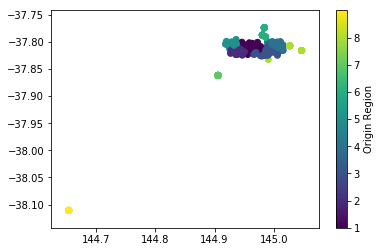

In [78]:
plt.scatter(data_new['Destination Longitude'], data_new['Destination Latitude'], c=data_new['Destination Region'])
plt.colorbar(ticks=range(9), label='Origin Region')

better visualisation using Tableau as I explained, first for Destination Region, second image is for Origin Region, I will include my .jpg files for the Assignment submission

In [402]:
%%html

<img src="Destination.JPG", width=800, height=800>

In [403]:
%%html

<img src="Origin.JPG", width=800, height=800>

In [79]:
# training a KNN model using my dataset and fitting it using the same dataset
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_new.iloc[:,6:8],data_new['Destination Region'])
prediction = knn.predict(data_new.iloc[:,6:8])

In [80]:
data_new[data_new['Destination Region'] != prediction]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
33,ID3558075284,1,4,6,-37.811394,144.995814,-37.822373,144.983577,2087.0,2018-01-20,22:10:11,457.86,22:17:48,20.24
36,ID3475883018,1,9,8,-38.110916,144.654173,-37.832651,144.990347,46542.0,2018-04-09,23:02:21,11211.30,2:09:12,56.55
37,ID3891083380,1,8,2,-37.815834,145.046450,-37.810230,144.930561,11396.0,2018-01-13,01:41:19,3180.90,2:34:19,31.64
41,ID1929513987,0,3,8,-37.814232,144.972816,-37.805624,144.933171,4535.0,2018-01-26,11:01:57,1191.36,11:21:48,4.46
51,ID1760736611,0,8,1,-37.807202,145.026637,-37.819849,144.968321,6535.0,2018-05-16,20:31:22,1658.16,20:59:00,10.53
74,ID1481986689,0,8,1,-37.807202,145.026637,-37.805636,144.936709,8640.0,2018-07-16,16:02:31,2250.00,16:40:01,11.73
97,ID5511239196,2,8,3,-37.807202,145.026637,-37.815866,144.972412,5780.0,2018-07-03,01:39:00,1439.10,2:02:59,114.72
107,ID1991833643,0,7,1,-37.861835,144.905716,-37.813013,144.938946,10797.0,2018-07-27,03:36:01,3489.66,4:34:10,20.05
115,ID1730303929,0,4,5,-37.804376,145.013608,-37.814916,144.927268,9454.0,2018-03-14,01:02:35,2496.96,1:44:11,16.53
126,ID1216666488,0,3,1,-37.824155,144.983906,-37.811470,144.937532,5608.0,2018-06-19,01:47:52,1369.14,2:10:41,13.20


The above code is what is different for the Destination Region with the predicted values, Next step I interchange my data destination region to my predicted values 

In [81]:
# inter-changing my destination region with what has been predicted
data_new.iloc[:,3] = prediction

Same step for the Origin Region

In [82]:
# training a KNN model using my dataset and fitting it using the same dataset
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(data_new.iloc[:,4:6],data_new['Origin Region'])
prediction2 = knn2.predict(data_new.iloc[:,4:6])

Indicating what is different in our dataframe and the predicted values for the Origin Region

In [83]:
data_new[data_new['Origin Region'] != prediction2]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
15,ID1565741586,0,7,3,-37.799989,144.992333,-37.821319,144.990853,2599.0,2018-07-17,15:19:01,657.60,15:29:58,8.58
28,ID3600347120,1,4,2,-37.815245,144.927660,-37.815400,144.937838,1940.0,2018-01-02,13:36:24,476.70,13:44:20,10.63
30,ID1186164002,0,5,3,-37.813666,144.940021,-37.818585,144.991588,5285.0,2018-06-04,12:57:34,1306.20,13:19:20,9.58
89,ID1893394031,0,1,6,-37.821504,144.945637,-37.790797,144.985865,5825.0,2018-05-22,05:36:53,1496.82,6:01:55,13.20
95,ID1808978826,0,1,2,-37.805822,144.933380,-37.812759,144.942810,1354.0,2018-04-15,03:27:25,326.46,3:32:51,17.67
138,ID3680199312,1,2,4,-37.816392,144.937338,-37.805358,144.999559,6653.0,2018-01-03,18:55:12,1723.44,19:23:55,14.61
305,ID3354304047,1,5,2,-37.816143,144.928748,-37.812761,144.934974,2258.0,2018-05-23,19:22:53,547.86,19:32:00,11.40
306,ID3833911825,1,4,9,-37.816218,145.007396,-38.110916,144.654173,47584.0,2018-04-03,20:12:46,11418.96,23:23:04,52.03


In [84]:
data_new.iloc[:,2] = prediction2

I now visualise the results in Tableau to see the improvements made Here I have demonstrated just the Origin Region improved segmentation of Region points

In [404]:
%%html

<img src="Cleaned_Origin.JPG", width=800, height=800>

## 1.7 Validating Journey Distance & Journey Time with Dijextra

Here I try to check if the recorded journey distance is consistent with respect to the nodes and edge files.
First thing is to add the location IDs from the nodes file in a new column for each Origin and Destination.

I use the merge method to merge the two dataframes for obtaining the correct location ID from the nodes file for both Origin and Destination locations of my dataframe

In [201]:
nodes = pd.read_csv('nodes.csv')

In [202]:
nodes.rename(columns={'Unnamed: 0': 'locid', 'lat': 'Origin Latitude', 'lon': 'Origin Longitude'}, inplace=True)

In [203]:
df = data_new.merge(nodes, on=['Origin Latitude','Origin Longitude'], how='left')

In [204]:
df.rename(columns={'locid': 'Origin locid'}, inplace=True)

In [205]:
nodes.rename(columns={'Origin Latitude': 'Destination Latitude', 'Origin Longitude': 'Destination Longitude'}, inplace=True)

In [206]:
df = df.merge(nodes, on=['Destination Latitude','Destination Longitude'], how='left')

In [207]:
df.rename(columns={'locid': 'Destination locid'}, inplace=True)

In [208]:
df.head()

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid
0,ID5377894413,2,7,8,-37.861835,144.905716,-37.807202,145.026637,13992.0,2018-06-07,05:15:28,4292.40,6:27:00,284.89,1390575046,304700558
1,ID3620970128,1,3,1,-37.809416,144.989454,-37.802575,144.963270,2765.1,2018-04-27,20:20:59,703.38,20:32:42,11.27,223007318,4418536080
2,ID1484350483,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51069.3,2018-02-01,06:00:42,12976.50,9:36:58,27.89,2455254505,5002706670
3,ID5975229564,2,6,8,-37.787442,144.980409,-37.807202,145.026637,5789.0,2018-01-04,04:47:50,1492.68,5:12:42,118.25,2204638268,304700558
4,ID3313658785,1,3,8,-37.822089,144.969470,-37.815834,145.046450,7925.0,2018-03-28,23:41:07,2356.08,0:20:23,25.31,2385141105,1889485053


In [209]:
df[['Origin locid','Destination locid']] = df[['Origin locid','Destination locid']].astype(str)

In [210]:
edge = pd.read_csv('edges.csv')

In [211]:
edge.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In order to be able to calculate and check if the Journey distance column is correct we need the python implementation of Dijextra Algorithm to calculate the shortest path from the edge file provided, exploring the edge file shows us that the edge file is basically the map of all possible node connections which if we apply the algorithm on should provide us with the shortest path.

for this part I have sourced a python implementation for Dijextra from https://gist.github.com/sabit-zahin/4366d29eeb0230ecc4e65e4d666062d1, I have then modified this to fit our purpose and use a unidirectional approach the distance seems to be unidirectional between nodes. also I have added a seperate container to calculate the time the journey takes for each path I have reflected these changes in the code

In [212]:
from collections import defaultdict
from heapq import heapify, heappop, heappush


class Graph:
    def __init__(self):
        self.adj_list = defaultdict(list)
    
    def add_edge(self, from_node, to_node, cost, time, directed=False): ## added time here
        """
        Adds an edge in the graph between from_node and to_node
        
        Parameters
        ----------
        from_node : Outward edge from this node
        to_node : Incoming edge to this node
        cost: Cost of traversing this edge
        time: Time of traversing this edge
        directed: True if the edge is uni-directional, False if its bi-directional
        
        """
        
        if cost < 0: raise ValueError("Costs must be non-negative for dijkstra to work")
        
        self.adj_list[from_node].append((to_node, cost, time)) ## modified to add time
        if not directed:
            self.add_edge(to_node, from_node, cost, time, True) ## modified to add time


def dijkstra(graph, source, destination):
    """
    Returns the shortest distance in the graph between source and destination nodes
    Returns None if source and destination are not connected or does not exist
    
    Parameters
    ----------
    graph : Graph object containing the nodes and edges
    source: Source node
    destination: Destination node
    
    Complexity
    ----------
    O((E + V) log(V)) roughly
    E : Number of edges in the graph
    V : Number of nodes in the graph
    
    """
    
    distance = {source: 0}
    time = {source: 0} ## added this dictionary to store time for each node
    queue = [(distance[source], time[source], source)] ## modified to add time by facilitating correct queue build
    heapify(queue)
    
    while queue:
        (d, t, u) = heappop(queue) ## modified to add time
        if u == destination: return (d,t)
        
        for v, w, z in graph.adj_list[u]:
            if (v not in distance) or ((d + w) < distance[v]):
                distance[v] = d + w
                time[v] = t + z  ## Here is when I add the time for each node journey to accumulate for the shortest path
                heappush(queue, (distance[v], time[v], v)) ## again modified to make sure time is accounted for

In [213]:
# Write this function to calculate the time for each path in the edge file
def calculate_dis(dist,speed):
    time = dist / (speed*10/36)
    return(time)    

In [214]:
temp_edge = edge.copy()

In [215]:
temp_edge['time'] = temp_edge.apply(lambda row: round(calculate_dis(row['distance(m)'], row['speed(km/h)']),2), axis=1)

In [216]:
temp_edge.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h),time
0,0,711327755,711332946,58.0,1,15.0,13.92
1,2,711327755,55725841,15.0,2,20.0,2.70
2,3,711327755,711327760,165.0,1,15.0,39.60
3,4,711327756,703557073,4.0,0,10.0,1.44
4,5,711327756,711332946,8.0,1,15.0,1.92


In [217]:
temp_edge = temp_edge.iloc[:,[1,2,3,6]]

In [218]:
temp_edge.head()

,u,v,distance(m),time
0,711327755,711332946,58.0,13.92
1,711327755,55725841,15.0,2.70
2,711327755,711327760,165.0,39.60
3,711327756,703557073,4.0,1.44
4,711327756,711332946,8.0,1.92


In [219]:
temp_edge[['u','v']] = temp_edge[['u','v']].astype('str')
edge_list = temp_edge[['u','v','distance(m)','time']].values.tolist()

I now build the graph using the edge list and the Class defined above

In [220]:
graph = Graph()

for each in edge_list:
    graph.add_edge(each[0], each[1], each[2], each[3])

In [221]:
df.head()

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid
0,ID5377894413,2,7,8,-37.861835,144.905716,-37.807202,145.026637,13992.0,2018-06-07,05:15:28,4292.40,6:27:00,284.89,1390575046,304700558
1,ID3620970128,1,3,1,-37.809416,144.989454,-37.802575,144.963270,2765.1,2018-04-27,20:20:59,703.38,20:32:42,11.27,223007318,4418536080
2,ID1484350483,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51069.3,2018-02-01,06:00:42,12976.50,9:36:58,27.89,2455254505,5002706670
3,ID5975229564,2,6,8,-37.787442,144.980409,-37.807202,145.026637,5789.0,2018-01-04,04:47:50,1492.68,5:12:42,118.25,2204638268,304700558
4,ID3313658785,1,3,8,-37.822089,144.969470,-37.815834,145.046450,7925.0,2018-03-28,23:41:07,2356.08,0:20:23,25.31,2385141105,1889485053


In [222]:
# testing for single journeys
dijkstra(graph, '1390575046', '304700558')

(13986.0, 4292.399999999998)

### 1.7.1 Applying dijkstra to the dataframe

Now we use the above class and method to calculate the shortest path for each row of my data and create a new column to compare the existing Journey Distance with the one calculated from Dijextra, To obtain this I have used apply method from the recommendations made in below article on how to optimise pandas and avoid iteration, however this section of the code will take a little longer to execute and recommend to run this before proceeding to other part of the code

https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6

In [223]:
%%timeit

df['Shortest Distance & Time'] = df.apply(lambda row: dijkstra(graph, row['Origin locid'], row['Destination locid']), axis=1)

12.1 s ± 465 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Little bit of a cleaning to seperate the tuple to two columns to be able to compare our main columns with these two new ones

In [224]:
df['Shortest Distance'] = df.apply(lambda row: row['Shortest Distance & Time'][0], axis=1)

In [225]:
df['Shortest Time'] = df.apply(lambda row: row['Shortest Distance & Time'][1], axis=1)

In [226]:
df.drop(columns='Shortest Distance & Time', inplace=True)

No we compare the rows that have different Journey Distance with Shortest Distance to fix these inconsistent values

In [227]:
df[df['Journey Distance(m)']!=df['Shortest Distance']]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid,Shortest Distance,Shortest Time
0,ID5377894413,2,7,8,-37.861835,144.905716,-37.807202,145.026637,13992.0,2018-06-07,05:15:28,4292.40,6:27:00,284.89,1390575046,304700558,13986.0,4292.40
1,ID3620970128,1,3,1,-37.809416,144.989454,-37.802575,144.963270,2765.1,2018-04-27,20:20:59,703.38,20:32:42,11.27,223007318,4418536080,2762.0,703.38
2,ID1484350483,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51069.3,2018-02-01,06:00:42,12976.50,9:36:58,27.89,2455254505,5002706670,51061.0,12976.50
8,ID3559388277,1,1,6,-37.808188,144.960027,-37.787433,144.980377,3632.9,2018-06-21,21:31:17,919.38,21:46:36,18.85,2325395487,2204638282,3635.0,919.38
11,ID3787225721,1,7,4,-37.861835,144.905716,-37.800078,145.010489,12721.9,2018-04-07,16:31:16,4073.10,17:39:09,32.61,1390575046,493873689,12716.0,4073.10


In [228]:
index = list(df[df['Journey Distance(m)']!=df['Shortest Distance']].index)

In [229]:
df.iloc[index,8] = df['Shortest Distance']

In [230]:
df[df['Journey Distance(m)']!=df['Shortest Distance']]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid,Shortest Distance,Shortest Time


Same thing for finding the rows that have different Travel Time and Shortest Time, but since the Time has many decimal digits we consider rounding this to two decimal place for both columns to make comparisions more meaningful as its journey time and won't make sense to have so many decimal places

In [231]:
df[round(df['Travel Time(s)'],2) != round(df['Shortest Time'],2)]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid,Shortest Distance,Shortest Time
20,ID5559058229,2,6,9,-37.790797,144.985865,-38.110916,144.654173,47193.0,2018-04-27,15:03:06,11530.62,18:15:16,706.11,4307007286,5002706670,47193.0,11530.26
23,ID1941038123,0,9,3,-38.110916,144.654173,-37.812106,144.973837,44424.0,2018-02-17,20:12:52,10707.36,23:11:19,30.84,5002706670,588197311,44424.0,10706.64
72,ID3856626661,1,7,2,-37.861835,144.905716,-37.822331,144.947582,8860.0,2018-03-03,07:33:54,3195.94,8:25:32,19.89,1390575046,2894990347,8860.0,3098.94
76,ID3852696848,1,7,1,-37.861835,144.905716,-37.803247,144.963554,9387.0,2018-06-20,03:04:36,3175.24,3:56:21,25.99,1390575046,6206956633,9387.0,3105.24
79,ID3553915400,1,1,6,-37.813503,144.961790,-37.773845,144.983689,5188.0,2018-05-24,18:23:55,1148.50,18:42:08,12.26,131238813,2455254499,5188.0,1093.50
82,ID1283528715,0,3,4,-37.818579,144.992130,-37.799435,144.988974,2551.0,2018-06-28,21:46:27,702.90,21:56:51,12.99,419632514,227324415,2551.0,624.90
85,ID3406329299,1,9,1,-38.110916,144.654173,-37.807193,144.967469,44174.0,2018-06-04,13:09:51,10766.96,16:07:51,50.42,5002706670,2384091373,44174.0,10680.96
86,ID5167880709,2,1,2,-37.815568,144.952716,-37.821511,144.945135,1271.0,2018-06-02,07:49:00,315.00,7:54:24,36.83,6167231001,844499869,1271.0,324.00
87,ID1489890638,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-07-07,05:26:08,4334.40,6:37:40,23.29,1390575046,304700558,13986.0,4292.40
89,ID1893394031,0,2,6,-37.821504,144.945637,-37.790797,144.985865,5825.0,2018-05-22,05:36:53,1496.82,6:01:55,13.20,758611953,4307007286,5825.0,1502.82


In [232]:
index = list(df[round(df['Travel Time(s)'],2) != round(df['Shortest Time'],2)].index)

In [233]:
df.iloc[index,11] = df['Shortest Time']

In [234]:
df[round(df['Travel Time(s)'],2) != round(df['Shortest Time'],2)]

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid,Shortest Distance,Shortest Time


We can see there is no more rows with a Travel time different with the Dijkstra calculate time at least for 2 decimal places which would be ok as per our assumption 

## 1.8 Uber Type and ID

From the initial EDA we can see that there are 4 categories of Uber types this is inconsistent with what has been mentioned as only 3 types of Uber in the data, there also appears to be a relationship between the ID and the Uber Type as in

    ID1 = Type 0
    ID3 = Type 1
    ID5 = Type 2

Hence we have to correct the rest of the rows with incorrect Uber Type

In [235]:
# Grouping by Uber Type
ubergroup = df.groupby('Uber Type')

In [236]:
ubergroup.describe()

Origin Region                                               \
                  count      mean       std  min  25%  50%  75%  max   
Uber Type                                                              
0                 135.0  5.377778  2.368533  1.0  3.5  6.0  7.0  9.0   
1                 121.0  4.809917  2.563572  1.0  3.0  5.0  7.0  9.0   
2                  64.0  5.171875  2.669966  1.0  3.0  5.0  8.0  9.0   
3                   5.0  4.800000  2.683282  2.0  3.0  5.0  5.0  9.0   

          Destination Region            ... Shortest Distance           \
                       count      mean  ...               75%      max   
Uber Type                               ...                              
0                      135.0  5.214815  ...          15592.00  51061.0   
1                      121.0  4.702479  ...          11366.00  50797.0   
2                       64.0  5.234375  ...          12524.75  51061.0   
3                        5.0  5.200000  ...          13257.00  43278.0   

          Shortest Time                                                        \
                  count         mean          std      min       25%      50%   
Uber Type                                                                       
0                 135.0  4589.910667  4227.917949   326.46  1452.960  2974.02   
1                 121.0  3576.023306  3630.522741   416.76  1163.460  2302.38   
2                  64.0  4030.810312  4120.386338   324.00  1383.195  2159.79   
3                   5.0  4544.052000  3361.379469  1977.54  2872.920  3306.18   

                              
               75%       max  
Uber Type                     
0          5120.52  13204.98  
1          3529.08  13204.98  
2          3952.20  13204.98  
3          4175.94  10387.68  

[4 rows x 88 columns]

In [237]:
ubergroup.get_group(3)

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid,Shortest Distance,Shortest Time
155,ID1748975203,3,2,7,-37.822107,144.938389,-37.861835,144.905716,9692.0,2018-06-27,12:30:24,3306.18,13:25:30,13.91,5457981822,1390575046,9692.0,3306.18
159,ID3924411947,3,3,7,-37.823887,144.973922,-37.861835,144.905716,8423.0,2018-05-26,03:58:04,2872.92,4:45:56,30.61,577522769,1390575046,8423.0,2872.92
163,ID5157831141,3,9,2,-38.110916,144.654173,-37.816698,144.931913,43278.0,2018-03-22,00:14:41,10387.68,3:07:48,645.88,5002706670,306968259,43278.0,10387.68
167,ID3807831815,3,5,7,-37.796680,144.935370,-37.861835,144.905716,13257.0,2018-07-28,17:34:51,4175.94,18:44:26,31.05,5579711429,1390575046,13257.0,4175.94
170,ID1668449406,3,5,3,-37.806189,144.929467,-37.824644,145.005777,8007.0,2018-02-08,17:37:16,1977.54,18:10:13,10.37,581707513,250933629,8007.0,1977.54


In [238]:
df.iloc[[155,170],1] = 0
df.iloc[[159,167],1] = 1
df.iloc[163,1] = 2

## 1.9 Correcting Arrival Time

The last thing I will check and correct is the Arrival Time, now because we don't have a refrence for the origin of the travel, I will make the assumption that the Departure time stands accurate and because we have the correct Travel time calculated from Dijkstra I will check and correct the Arrival Time respectivley

In [239]:
df['Departure Time convert'] = df.apply(lambda row: datetime.strptime(row['Departure Time'],'%H:%M:%S'), axis=1)

In [240]:
df.head()

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid,Shortest Distance,Shortest Time,Departure Time convert
0,ID5377894413,2,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-06-07,05:15:28,4292.40,6:27:00,284.89,1390575046,304700558,13986.0,4292.40,1900-01-01 05:15:28
1,ID3620970128,1,3,1,-37.809416,144.989454,-37.802575,144.963270,2762.0,2018-04-27,20:20:59,703.38,20:32:42,11.27,223007318,4418536080,2762.0,703.38,1900-01-01 20:20:59
2,ID1484350483,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51061.0,2018-02-01,06:00:42,12976.50,9:36:58,27.89,2455254505,5002706670,51061.0,12976.50,1900-01-01 06:00:42
3,ID5975229564,2,6,8,-37.787442,144.980409,-37.807202,145.026637,5789.0,2018-01-04,04:47:50,1492.68,5:12:42,118.25,2204638268,304700558,5789.0,1492.68,1900-01-01 04:47:50
4,ID3313658785,1,3,8,-37.822089,144.969470,-37.815834,145.046450,7925.0,2018-03-28,23:41:07,2356.08,0:20:23,25.31,2385141105,1889485053,7925.0,2356.08,1900-01-01 23:41:07


Just some testing to get the time...

In [241]:
format(datetime.strptime(df['Departure Time'].values[0],'%H:%M:%S') + timedelta(seconds=df['Shortest Time'].values[0]),"%H:%M:%S")

'06:27:00'

Now I apply the same function above to get the correct arrival time in all rows

In [242]:
df['Arrival Time check'] = df.apply(lambda row: format(datetime.strptime(row['Departure Time'],'%H:%M:%S') + timedelta(seconds=row['Travel Time(s)']),"%H:%M:%S"), axis=1)

Now exploring further we can see there is two kind of difference in the values for the Arrival Time in the original data and the values we calculated. One issue is that for hour there is one digit in this column where as what we have calculated returns two digit, the other issue is that in some columns the actual value is incorrect, we fix both of these issues to have a standard format and correct values

In [249]:
df.iloc[:,12] = df['Arrival Time check']

# Section 2. Exploring Fare & relation to other features

In this section I will try to find the linear dependencies of my columns with the fare, from what we know so far is that there is some linear dependencies between some columns.

First thing I do is to prepare my dataframe so that I can later filter on these features

In [251]:
df.head()

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Origin locid,Destination locid,Shortest Distance,Shortest Time,Departure Time convert,Arrival Time check
0,ID5377894413,2,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-06-07,05:15:28,4292.40,06:27:00,284.89,1390575046,304700558,13986.0,4292.40,1900-01-01 05:15:28,06:27:00
1,ID3620970128,1,3,1,-37.809416,144.989454,-37.802575,144.963270,2762.0,2018-04-27,20:20:59,703.38,20:32:42,11.27,223007318,4418536080,2762.0,703.38,1900-01-01 20:20:59,20:32:42
2,ID1484350483,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51061.0,2018-02-01,06:00:42,12976.50,09:36:58,27.89,2455254505,5002706670,51061.0,12976.50,1900-01-01 06:00:42,09:36:58
3,ID5975229564,2,6,8,-37.787442,144.980409,-37.807202,145.026637,5789.0,2018-01-04,04:47:50,1492.68,05:12:42,118.25,2204638268,304700558,5789.0,1492.68,1900-01-01 04:47:50,05:12:42
4,ID3313658785,1,3,8,-37.822089,144.969470,-37.815834,145.046450,7925.0,2018-03-28,23:41:07,2356.08,00:20:23,25.31,2385141105,1889485053,7925.0,2356.08,1900-01-01 23:41:07,00:20:23


In [252]:
feature_df = df.drop(columns=['Origin locid', 'Destination locid', 'Shortest Distance', 'Shortest Time', 'Departure Time convert', 'Arrival Time check']).copy()

In [253]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 14 columns):
ID                       325 non-null object
Uber Type                325 non-null int64
Origin Region            325 non-null int64
Destination Region       325 non-null int64
Origin Latitude          325 non-null float64
Origin Longitude         325 non-null float64
Destination Latitude     325 non-null float64
Destination Longitude    325 non-null float64
Journey Distance(m)      325 non-null float64
Departure Date           325 non-null object
Departure Time           325 non-null object
Travel Time(s)           325 non-null float64
Arrival Time             325 non-null object
Fare$                    325 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 38.1+ KB


I now convert the Departure date to a datetime column and create a new column to reflect day of the week, then I create another column indicating if the travel was done on weekday or weekend

In [254]:
feature_df['Departure Date'] = pd.to_datetime(feature_df['Departure Date'], format='%Y-%m-%d')

In [255]:
feature_df['Departure Day Week'] = feature_df['Departure Date'].dt.weekday_name

In [256]:
feature_df['Departure weekend'] = feature_df['Departure Day Week'].apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Now I have a feature which reflects if the trip was made on a weekend or weekday.

Next is to correct the Departure time frield and add additional features which reflect the morning, afternoon and evening

In [257]:
feature_df['Departure Time convert'] = feature_df.apply(lambda row: datetime.strptime(row['Departure Time'],'%H:%M:%S'), axis=1)

I now define time ranges to check against

In [258]:
morning_start = datetime.strptime('06:00:00','%H:%M:%S')
noon_start = datetime.strptime('12:00:00','%H:%M:%S')
night_start = datetime.strptime('21:00:00','%H:%M:%S')
night_end = datetime.strptime('05:59:59','%H:%M:%S')

Now I create columns to indicate the fare type depending on the departure time

In [259]:
feature_df['morning_fare'] = feature_df["Departure Time convert"].apply(lambda x: 1 if (x >= morning_start) & (x < noon_start) else 0)

In [260]:
feature_df['noon_fare'] = feature_df["Departure Time convert"].apply(lambda x: 1 if (x >= noon_start) & (x < night_start) else 0)

In [261]:
feature_df['night_fare'] = feature_df["Departure Time convert"].apply(lambda x: 1 if (x >= night_start) | (x < night_end) else 0)

Lets explore the dataset from a quick correlation heatmap point of view just to see some heavy correlated features

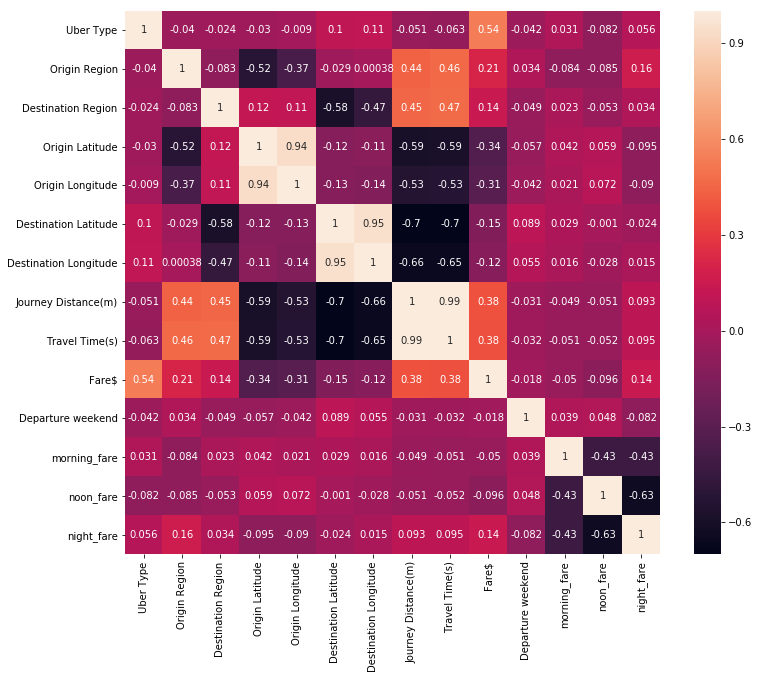

In [262]:
plt.figure(figsize=(12,10))
cor = feature_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

We can see that the fare is heavily corrolated with the Journey Distance and Travel Time

Next I will explore the fare further by filtering each Uber type and departure weekday weekend and also Departure time with respect to the features that was created

## 2.1 Exploring Uber Type 0

Here I explore the linear dependencies for Ubertype 0, I do this by grouping based on uber type, then for each category such as travel time (morning, noon, night) and for weekday and weekend, I filter the data and draw a plot to demonstrate the linear dependecy between the fare, the journey time or distance which should be very similar, lets see how this works...

In [263]:
uber_g0 =  feature_df.groupby('Uber Type')

In [264]:
type0_weekday_morning = uber_g0.get_group(0)[(uber_g0.get_group(0)['Departure weekend']==0) & (uber_g0.get_group(0)['morning_fare']==1)]

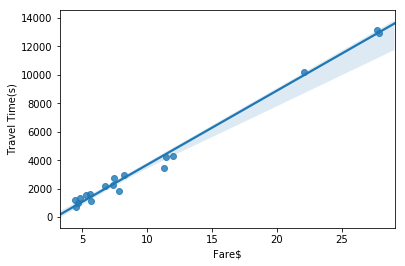

In [265]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type0_weekday_morning)

In [266]:
type0_weekday_noon = uber_g0.get_group(0)[(uber_g0.get_group(0)['Departure weekend']==0) & (uber_g0.get_group(0)['noon_fare']==1)]

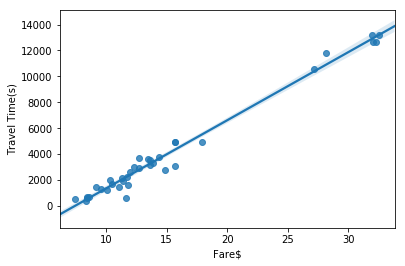

In [267]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type0_weekday_noon)

In [268]:
type0_weekday_night = uber_g0.get_group(0)[(uber_g0.get_group(0)['Departure weekend']==0) & (uber_g0.get_group(0)['night_fare']==1)]

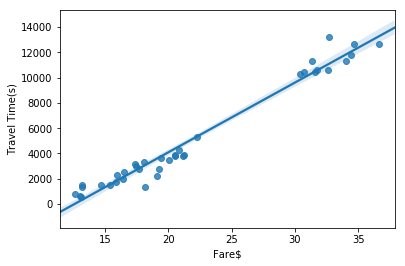

In [269]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type0_weekday_night)

In [270]:
type0_weekend_morning = uber_g0.get_group(0)[(uber_g0.get_group(0)['Departure weekend']==1) & (uber_g0.get_group(0)['morning_fare']==1)]

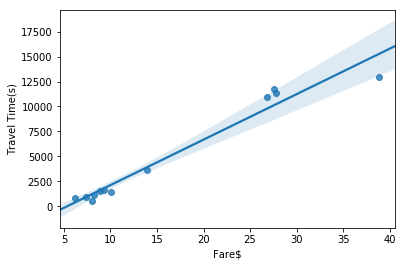

In [271]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type0_weekend_morning)

In [272]:
type0_weekend_noon = uber_g0.get_group(0)[(uber_g0.get_group(0)['Departure weekend']==1) & (uber_g0.get_group(0)['noon_fare']==1)]

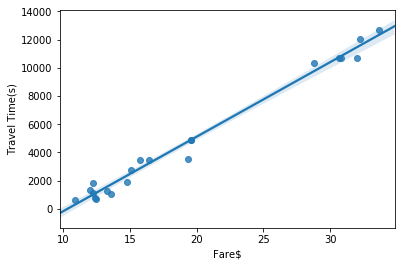

In [273]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type0_weekend_noon)

In [274]:
type0_weekend_night = uber_g0.get_group(0)[(uber_g0.get_group(0)['Departure weekend']==1) & (uber_g0.get_group(0)['night_fare']==1)]

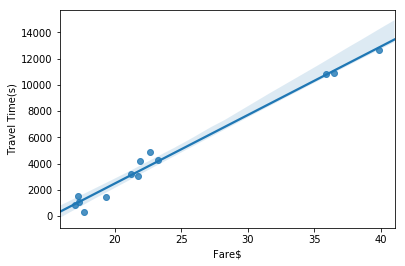

In [275]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type0_weekend_night)

## 2.2 Exploring Uber Type 1

Exactley the same approach in showing the linear dependencies for Ubertype 1

In [276]:
type1_weekday_morning = uber_g0.get_group(1)[(uber_g0.get_group(1)['Departure weekend']==0) & (uber_g0.get_group(1)['morning_fare']==1)]

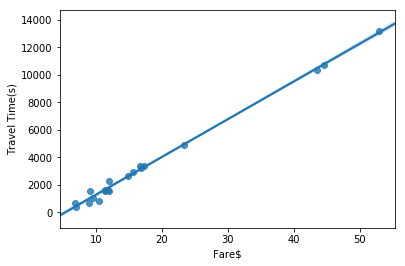

In [277]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type1_weekday_morning)

In [278]:
type1_weekday_noon = uber_g0.get_group(1)[(uber_g0.get_group(1)['Departure weekend']==0) & (uber_g0.get_group(1)['noon_fare']==1)]

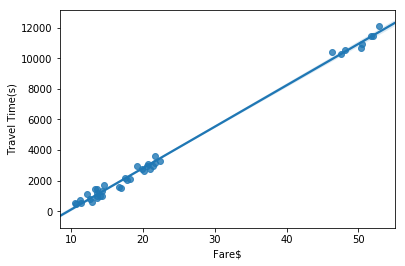

In [279]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type1_weekday_noon)

In [280]:
type1_weekday_night = uber_g0.get_group(1)[(uber_g0.get_group(1)['Departure weekend']==0) & (uber_g0.get_group(1)['night_fare']==1)]

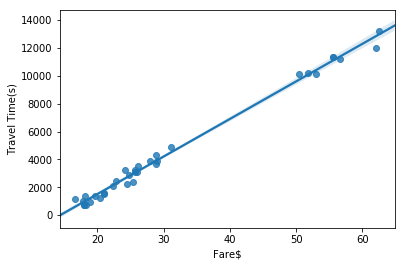

In [281]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type1_weekday_night)

In [282]:
type1_weekend_morning = uber_g0.get_group(1)[(uber_g0.get_group(1)['Departure weekend']==1) & (uber_g0.get_group(1)['morning_fare']==1)]

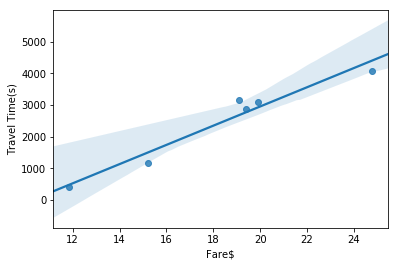

In [283]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type1_weekend_morning)

In [284]:
type1_weekend_noon = uber_g0.get_group(1)[(uber_g0.get_group(1)['Departure weekend']==1) & (uber_g0.get_group(1)['noon_fare']==1)]

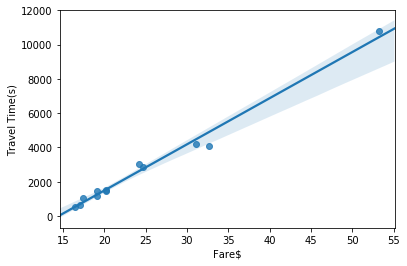

In [285]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type1_weekend_noon)

In [286]:
type1_weekend_night = uber_g0.get_group(1)[(uber_g0.get_group(1)['Departure weekend']==1) & (uber_g0.get_group(1)['night_fare']==1)]

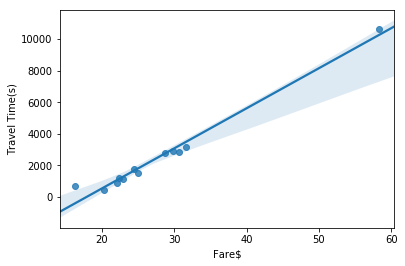

In [287]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type1_weekend_night)

## 2.3 Exploring Uber Type 2

Exactley the same approach in showing the linear dependencies for Ubertype 2

In [288]:
type2_weekday_morning = uber_g0.get_group(2)[(uber_g0.get_group(2)['Departure weekend']==0) & (uber_g0.get_group(2)['morning_fare']==1)]

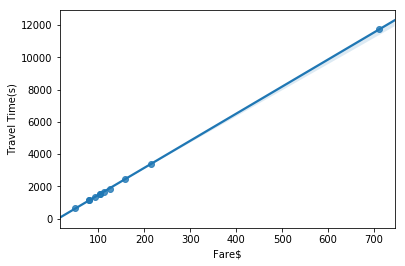

In [289]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type2_weekday_morning)

In [290]:
type2_weekday_noon = uber_g0.get_group(2)[(uber_g0.get_group(2)['Departure weekend']==0) & (uber_g0.get_group(2)['noon_fare']==1)]

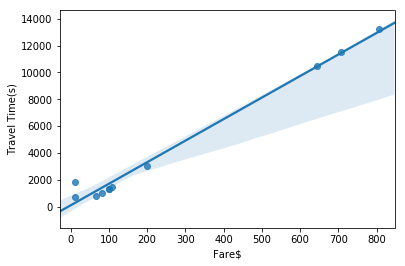

In [291]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type2_weekday_noon)

In [292]:
type2_weekday_night = uber_g0.get_group(2)[(uber_g0.get_group(2)['Departure weekend']==0) & (uber_g0.get_group(2)['night_fare']==1)]

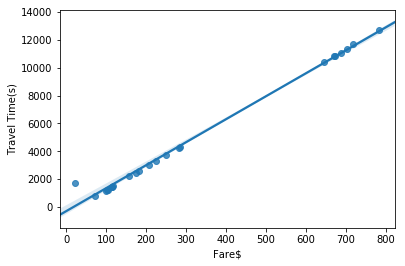

In [293]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type2_weekday_night)

In [294]:
type2_weekend_morning = uber_g0.get_group(2)[(uber_g0.get_group(2)['Departure weekend']==1) & (uber_g0.get_group(2)['morning_fare']==1)]

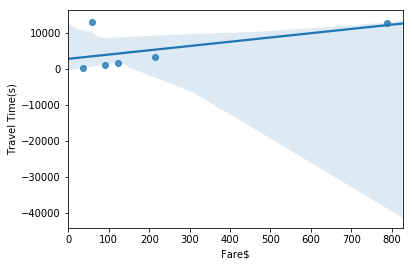

In [295]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type2_weekend_morning)

In [296]:
type2_weekend_noon = uber_g0.get_group(2)[(uber_g0.get_group(2)['Departure weekend']==1) & (uber_g0.get_group(2)['noon_fare']==1)]

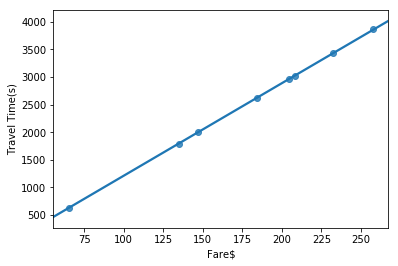

In [297]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type2_weekend_noon)

In [298]:
type2_weekend_night = uber_g0.get_group(2)[(uber_g0.get_group(2)['Departure weekend']==1) & (uber_g0.get_group(2)['night_fare']==1)]

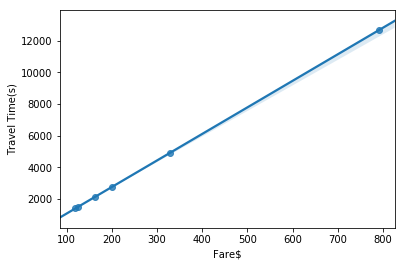

In [299]:
sns.regplot(x='Fare$', y='Travel Time(s)', data=type2_weekend_night)

Overall we can see that the fare has a very linear dependency with the Travel time and Journey Distance with respect to the Uber Type, week day trip or weekend and time of the day the trip has taken place. there are some occasions where some of the data deviates from this linear relationship which can be caused by noise in the data. I am generally not going to impute these values since any model I will have to build would be done with little amount of data in each case and would not provide a realistic value

## 2.4 Building 3 linear regression models based on UberType

Here I build and train a linear regression model for each Uber Type to be used in later stages of this work, I start by eliminating the columns I don't need and only keeping my features and also combining the dataset from the missing data to train the model with more data points, this would allow me to overall have a better model as I am using more data and we know the missing data is clean I only remove any rows with null values

In [300]:
add_miss_df = pd.read_csv('30035678_missing_value.csv')

In [301]:
#making sure there is no missing values
add_miss_df.dropna(inplace=True)

In [302]:
# Now I create the features I require for the model
add_miss_df['Departure Date'] = pd.to_datetime(add_miss_df['Departure Date'], format='%Y-%m-%d')
add_miss_df['Departure Day Week'] = add_miss_df['Departure Date'].dt.weekday_name
add_miss_df['Departure weekend'] = add_miss_df['Departure Day Week'].apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
morning_start = datetime.strptime('06:00:00','%H:%M:%S')
noon_start = datetime.strptime('12:00:00','%H:%M:%S')
night_start = datetime.strptime('21:00:00','%H:%M:%S')
night_end = datetime.strptime('05:59:59','%H:%M:%S')
add_miss_df['Departure Time convert'] = add_miss_df.apply(lambda row: datetime.strptime(row['Departure Time'],'%H:%M:%S'), axis=1)
add_miss_df['morning_fare'] = add_miss_df["Departure Time convert"].apply(lambda x: 1 if (x >= morning_start) & (x < noon_start) else 0)
add_miss_df['noon_fare'] = add_miss_df["Departure Time convert"].apply(lambda x: 1 if (x >= noon_start) & (x < night_start) else 0)

In [303]:
add_miss_df.drop(columns=['Unnamed: 0','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Departure Date','Departure Time','Departure Day Week','Departure Time convert','Arrival Time'], inplace=True)

In [304]:
feature_df_lm = feature_df.drop(columns=['Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Departure Day Week','Departure Time convert','night_fare','Departure Date','Departure Time','Arrival Time','ID']).copy()

In [305]:
add_miss_df['Uber Type'] = add_miss_df['Uber Type'].astype('int64')

Now I concatenate the two dataframes together to have one larger dataframe for my model

In [306]:
concat_df_lm = pd.concat([add_miss_df, feature_df_lm])

In [307]:
concat_df_lm.shape

(398, 7)

In [308]:
df_grp = concat_df_lm.groupby('Uber Type')

In [309]:
grp0_lm = df_grp.get_group(0).copy()
grp1_lm = df_grp.get_group(1).copy()
grp2_lm = df_grp.get_group(2).copy()

Here I build the models and fit them using my concatenated data for each uber type

In [310]:
# Model for Ubertype 0
linear_model_type0 = LinearRegression()
linear_model_type0.fit(grp0_lm[[x for x in grp0_lm.columns if x != 'Fare$']],grp0_lm['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [311]:
# Model for Ubertype 1
linear_model_type1 = LinearRegression()
linear_model_type1.fit(grp1_lm[[x for x in grp1_lm.columns if x != 'Fare$']],grp1_lm['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [312]:
# Model for Ubertype 2
linear_model_type2 = LinearRegression()
linear_model_type2.fit(grp2_lm[[x for x in grp2_lm.columns if x != 'Fare$']],grp2_lm['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 2.5 Creating the Output file

in this section I save the final cleaned data file for my output

In [313]:
feature_df.head()

,ID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Departure Day Week,Departure weekend,Departure Time convert,morning_fare,noon_fare,night_fare
0,ID5377894413,2,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-06-07,05:15:28,4292.40,06:27:00,284.89,Thursday,0,1900-01-01 05:15:28,0,0,1
1,ID3620970128,1,3,1,-37.809416,144.989454,-37.802575,144.963270,2762.0,2018-04-27,20:20:59,703.38,20:32:42,11.27,Friday,0,1900-01-01 20:20:59,0,1,0
2,ID1484350483,0,6,9,-37.773803,144.983647,-38.110916,144.654173,51061.0,2018-02-01,06:00:42,12976.50,09:36:58,27.89,Thursday,0,1900-01-01 06:00:42,1,0,0
3,ID5975229564,2,6,8,-37.787442,144.980409,-37.807202,145.026637,5789.0,2018-01-04,04:47:50,1492.68,05:12:42,118.25,Thursday,0,1900-01-01 04:47:50,0,0,1
4,ID3313658785,1,3,8,-37.822089,144.969470,-37.815834,145.046450,7925.0,2018-03-28,23:41:07,2356.08,00:20:23,25.31,Wednesday,0,1900-01-01 23:41:07,0,0,1


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 14 columns):
ID                       325 non-null object
Uber Type                325 non-null int64
Origin Region            325 non-null int64
Destination Region       325 non-null int64
Origin Latitude          325 non-null float64
Origin Longitude         325 non-null float64
Destination Latitude     325 non-null float64
Destination Longitude    325 non-null float64
Journey Distance(m)      325 non-null float64
Departure Date           325 non-null object
Departure Time           325 non-null object
Travel Time(s)           325 non-null float64
Arrival Time             325 non-null object
Fare$                    325 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 35.6+ KB


In [315]:
output = feature_df.drop(columns=['Departure Day Week','Departure weekend','Departure Time convert','morning_fare','noon_fare','night_fare']).copy()

In [316]:
output.rename(columns={"ID":""},inplace=True)

In [317]:
output.to_csv('30035678_dirty_data_solution.csv',index=False)

# Section 3 Detect and remove outliers in data

In [318]:
outlier_df = pd.read_csv("30035678_outliers.csv")

First I prepare the Data for the prediction requirements which involves converting some columns like date of travel and time to a categorical value, following some of the steps I did before in previous part

In [319]:
outlier_df['Departure Date'] = pd.to_datetime(outlier_df['Departure Date'], format='%Y-%m-%d')

In [320]:
outlier_df['Departure Day Week'] = outlier_df['Departure Date'].dt.weekday_name

In [321]:
outlier_df['Departure weekend'] = outlier_df['Departure Day Week'].apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

In [322]:
morning_start = datetime.strptime('06:00:00','%H:%M:%S')
noon_start = datetime.strptime('12:00:00','%H:%M:%S')
night_start = datetime.strptime('21:00:00','%H:%M:%S')
night_end = datetime.strptime('05:59:59','%H:%M:%S')

In [323]:
outlier_df['Departure Time convert'] = outlier_df.apply(lambda row: datetime.strptime(row['Departure Time'],'%H:%M:%S'), axis=1)

In [324]:
outlier_df['morning_fare'] = outlier_df["Departure Time convert"].apply(lambda x: 1 if (x >= morning_start) & (x < noon_start) else 0)

In [325]:
outlier_df['noon_fare'] = outlier_df["Departure Time convert"].apply(lambda x: 1 if (x >= noon_start) & (x < night_start) else 0)

In [326]:
outlier_df.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Departure Day Week,Departure weekend,Departure Time convert,morning_fare,noon_fare
0,0,ID1944975017,0,6,1,-37.773803,144.983647,-37.803683,144.964986,6845.0,2018-03-24,22:41:22,2249.34,23:18:51,18.33,Saturday,1,1900-01-01 22:41:22,0,0
1,1,ID1939335920,0,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-06-07,19:55:05,12681.06,23:26:26,24.49,Thursday,0,1900-01-01 19:55:05,0,1
2,2,ID1743579293,0,3,2,-37.811557,144.993585,-37.815153,144.927517,7289.0,2018-07-01,02:37:12,1850.40,3:08:02,17.98,Sunday,1,1900-01-01 02:37:12,0,0
3,3,ID5658576348,2,3,4,-37.810572,145.000834,-37.805319,145.015041,1665.0,2018-06-27,23:14:34,397.86,23:21:11,62.86,Wednesday,0,1900-01-01 23:14:34,0,0
4,4,ID3663433724,1,4,3,-37.809083,145.011628,-37.813724,144.985130,2927.0,2018-07-24,19:10:44,693.24,19:22:17,14.25,Tuesday,0,1900-01-01 19:10:44,0,1


In [327]:
outlier_cl_df = outlier_df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Departure Date','Departure Time','Arrival Time','Departure Day Week','Departure Time convert']).copy()

In [328]:
outlier_cl_df.head()

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare
0,0,6845.0,2249.34,18.33,1,0,0
1,0,51032.0,12681.06,24.49,0,0,1
2,0,7289.0,1850.40,17.98,1,0,0
3,2,1665.0,397.86,62.86,0,0,0
4,1,2927.0,693.24,14.25,0,0,1


Now I group the data by Ubertype

In [329]:
grp_by_uber = outlier_cl_df.groupby('Uber Type')

In [330]:
grp_by_uber['Fare$'].describe()

,count,mean,std,min,25%,50%,75%,max
Uber Type,,,,,,,,
0,66.0,13.247576,5.655274,2.760,9.2500,12.615,16.4600,28.58
1,40.0,20.422375,11.038673,4.405,12.4825,18.395,26.3525,57.17
2,18.0,330.660833,335.453108,21.255,100.3425,138.490,411.6950,1030.21


In [331]:
grp_0 = grp_by_uber.get_group(0).copy()
grp_1 = grp_by_uber.get_group(1).copy()
grp_2 = grp_by_uber.get_group(2).copy()

## 3.1 Outlier detection method

I now use the interquantile range of the residual values for detecting my outliers.

Some further explanation on this I read on
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In order to do this I make a function which iterativley calculates the outlier threshold by applying 1.5 multiplied by the IQR of the residual of predicted values with the real values in my dataset. in every iteration I remove the maximum outlier from my data and calculate the threshold again.

In [332]:
def function_detect_outlier(df):
    remove_idx = []
    out_df = df.copy()
    check = True
    while check:
        Q1 = out_df.sort_values().quantile(0.25)
        Q3 = out_df.sort_values().quantile(0.75)
        IQR = Q3-Q1
        if list(out_df[(out_df > (Q3 + 1.5 * IQR)) | (out_df < (Q1 - 1.5 * IQR))]) != []:
            outlier = out_df[(out_df > (Q3 + 1.5 * IQR)) | (out_df < (Q1 - 1.5 * IQR))].idxmax()
            remove_idx.append(outlier)
            out_df = out_df[~out_df.index.isin(remove_idx)].copy()
        else:
            check = False
    return(remove_idx)

## 3.2 Outliers for each Uber Type

Here I use the above function for uber type 0 and the model I have developed earlier to find the outliers in this uber type

In [333]:
#predicting the fare value for Uber type 0 using the previous section model
type0_pred = linear_model_type0.predict(grp_0.drop(['Fare$'],axis=1))
type0_res = abs(grp_0['Fare$'] - type0_pred)

In [334]:
type0_outlier_idx = function_detect_outlier(type0_res)

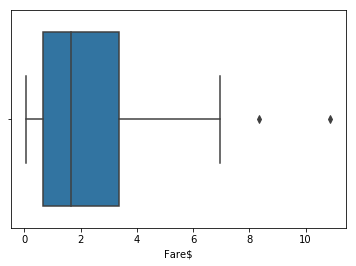

In [335]:
sns.boxplot(type0_res)

In [336]:
#predicting the fare value for Uber type 1 using the previous section model
type1_pred = linear_model_type1.predict(grp_1.drop(['Fare$'],axis=1))
type1_res = abs(grp_1['Fare$'] - type1_pred)

In [337]:
type1_outlier_idx = function_detect_outlier(type1_res)

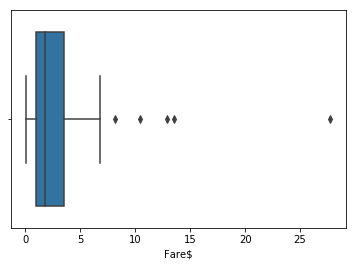

In [338]:
sns.boxplot(type1_res)

In [339]:
type2_pred = linear_model_type2.predict(grp_2.drop(['Fare$'],axis=1))
type2_res = abs(grp_2['Fare$'] - type2_pred)

In [340]:
type2_outlier_idx = function_detect_outlier(type2_res)

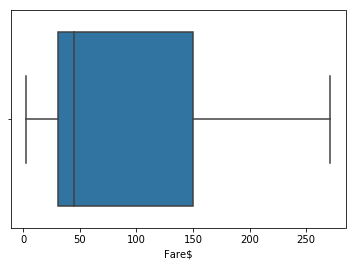

In [341]:
sns.boxplot(type2_res)

In [342]:
# indexes to be removed
final_out_idx = type0_outlier_idx + type1_outlier_idx + type2_outlier_idx

In [343]:
output_df = outlier_df[~outlier_df.index.isin(final_out_idx)].copy()

In [344]:
outlier_df.shape

(124, 20)

In [345]:
output_df.shape

(114, 20)

In [346]:
output_df.drop(columns=['Departure Day Week','Departure weekend','Departure Time convert','morning_fare','noon_fare'], inplace=True)

In [349]:
output_df.rename(columns={"Unnamed: 0.1":"Unnamed: 0", "Unnamed: 0":""},inplace=True)

In [350]:
output_df.to_csv('30035678_outliers_solution.csv',index=False)

# Section 4 Impute the missing values in data

In [351]:
missing_df = pd.read_csv('30035678_missing_value.csv')

In [352]:
missing_df.isna().describe()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
count,111,111,111,111,111,111,111,111,111,111,111,111,111,111
unique,1,2,1,1,1,1,1,1,1,1,1,1,1,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,111,91,111,111,111,111,111,111,111,111,111,111,111,93


In [353]:
missing_df.isna().sum()

Unnamed: 0                0
Uber Type                20
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    18
dtype: int64

from above we see that there is missing values for two columns, 20 values missing from Uber Type and 18 values missing from the Fare column...

Now in order to impute the missing values for Uber Type we take into account the same relationship we discovered between the IDs and the UberType

    ID1 = Type 0
    ID3 = Type 1
    ID5 = Type 2

In [354]:
uberna = missing_df[missing_df['Uber Type'].isna()].copy()

In [355]:
regex = r"ID(.{1})"
uberna.iloc[:,1] = uberna.apply(lambda row: 0 if re.findall(regex, row['Unnamed: 0'])[0] == '1' else (1.0 if re.findall(regex, row['Unnamed: 0'])[0] == '3' else 2.0), axis=1)

In [356]:
missing_df['Uber Type'].fillna(uberna['Uber Type'],inplace=True)

In [357]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 14 columns):
Unnamed: 0               111 non-null object
Uber Type                111 non-null float64
Origin Region            111 non-null int64
Destination Region       111 non-null int64
Origin Latitude          111 non-null float64
Origin Longitude         111 non-null float64
Destination Latitude     111 non-null float64
Destination Longitude    111 non-null float64
Journey Distance(m)      111 non-null float64
Departure Date           111 non-null object
Departure Time           111 non-null object
Travel Time(s)           111 non-null float64
Arrival Time             111 non-null object
Fare$                    93 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 12.2+ KB


In [358]:
missing_df['Uber Type'] = missing_df['Uber Type'].astype('int')

Now I featurise the dataframe based on what has been described as part of the task. We know the fare is calculated different for each uber type and also depending on the trip taking place in weekend or weekday and also what time of the day example morning, noon, night. based on these and also the journey distance and travel time I featurise the dataframe to prepare for making a model

In [359]:
missing_df.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3489526986,1,4,9,-37.815845,145.013596,-38.110916,144.654173,48228.0,2018-07-10,07:53:17,11595.54,11:06:32,60.61
1,ID5373725669,2,7,3,-37.861835,144.905716,-37.824144,144.982515,8721.0,2018-01-07,10:46:36,2877.96,11:34:33,233.73
2,ID3999702053,1,9,4,-38.110916,144.654173,-37.811124,145.001788,47045.0,2018-03-27,11:02:01,11243.04,14:09:24,59.83
3,ID1326283989,0,4,3,-37.810678,145.011958,-37.823290,144.976658,4698.0,2018-02-10,00:37:27,1115.34,0:56:02,18.95
4,ID1757590935,0,3,6,-37.825797,144.968032,-37.787433,144.980377,4915.0,2018-06-19,16:31:00,1220.58,16:51:20,10.19


In [360]:
missing_df['Departure Date'] = pd.to_datetime(missing_df['Departure Date'], format='%Y-%m-%d')

In [361]:
missing_df['Departure Day Week'] = missing_df['Departure Date'].dt.weekday_name

Now I have a column indicating the day of the week which each trip took place, I can make a column indicating weekends with 1 and weekday with 0

In [362]:
missing_df['Departure weekend'] = missing_df['Departure Day Week'].apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Now I will featurise the time of the trip with respect to the time of the day, for this I will ultimatley create two columns indicating:

    morning 1 0
    noon 0 1
    night 0 0

In [363]:
morning_start = datetime.strptime('06:00:00','%H:%M:%S')
noon_start = datetime.strptime('12:00:00','%H:%M:%S')
night_start = datetime.strptime('21:00:00','%H:%M:%S')
night_end = datetime.strptime('05:59:59','%H:%M:%S')

In [364]:
missing_df['Departure Time convert'] = missing_df.apply(lambda row: datetime.strptime(row['Departure Time'],'%H:%M:%S'), axis=1)

In [365]:
missing_df['morning_fare'] = missing_df["Departure Time convert"].apply(lambda x: 1 if (x >= morning_start) & (x < noon_start) else 0)

In [366]:
missing_df['noon_fare'] = missing_df["Departure Time convert"].apply(lambda x: 1 if (x >= noon_start) & (x < night_start) else 0)

Now I prepare my dataframe for predicting using the same model I build earlier for each uber type by removing unwanted columns 

In [367]:
lm_missing_df = missing_df.drop(columns=['Unnamed: 0','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Departure Date','Departure Time','Arrival Time','Departure Day Week','Departure Time convert']).copy()

In [368]:
uber_group =  lm_missing_df.groupby('Uber Type')

In [369]:
uber_0 = uber_group.get_group(0).copy()
uber_1 = uber_group.get_group(1).copy()
uber_2 = uber_group.get_group(2).copy()

In [370]:
lm_missing_df.head()

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare
0,1,48228.0,11595.54,60.61,0,1,0
1,2,8721.0,2877.96,233.73,1,1,0
2,1,47045.0,11243.04,59.83,0,1,0
3,0,4698.0,1115.34,18.95,1,0,0
4,0,4915.0,1220.58,10.19,0,0,1


## 4.1 Creating model and imputing for Uber type 0

Now I predict values for Uber type 0 to be used to impute the missing values for Fare for this type of Uber

In [371]:
uber_0['Fare$'].isnull().sum()

10

In [372]:
uber_0.shape

(50, 7)

In [373]:
uber_0[uber_0['Fare$'].isnull()]

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare
54,0,6678.0,1667.22,NaN,1,0,1
62,0,6159.0,1509.96,NaN,1,0,1
64,0,1460.0,371.94,NaN,1,0,1
82,0,11630.0,3697.02,NaN,0,0,0
86,0,1410.0,335.46,NaN,0,1,0
89,0,7807.0,2734.44,NaN,0,0,0
93,0,8649.0,2175.24,NaN,0,1,0
94,0,10399.0,3001.74,NaN,0,0,1
97,0,8615.0,2970.90,NaN,0,0,1
104,0,7056.0,1604.04,NaN,0,1,0


In [374]:
# calling the predict method of the linearregression model we build
type0_impute = linear_model_type0.predict(uber_0.drop(['Fare$'],axis=1))

In [375]:
type0_impute

array([17.77327818,  9.71726691, 14.15192658, 25.51959954, 23.17328994,
       17.21351104, 17.58374055, 35.54099008,  5.40471559, 13.13584881,
       14.79722207, 11.93294608,  9.93582352,  9.00737856, 16.67247137,
       25.71529362, 30.49505886, 11.84353128,  6.11487245, 16.73047045,
       12.8040614 , 15.5784055 , 14.50405266, 13.67878526, 18.96575724,
       30.26223019, 13.32687845, 14.15782939, 13.86484501, 11.78440851,
        9.84507404, 10.57267553, 16.59006439, 12.92542066, 13.70825701,
       19.02941702,  9.59539131, 14.02932144,  4.00444463, 21.31279604,
       17.26331582,  8.10070791,  7.38285774, 13.05229101, 21.45958415,
       13.0657448 , 17.8557042 , 12.56412676,  6.30636604,  8.18394813])

I use below value assignment to basically impute only the missing values from Fare column in my dataframe for Uber type 0

In [376]:
uber_0['Fare$'][uber_0['Fare$'].isnull()] = linear_model_type0.predict(uber_0.drop(['Fare$'],axis=1))

C:\Users\pouri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
uber_0[uber_0['Fare$'].isnull()]

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare


We can see that all null values have been replaced and we can move on to the next Uber type

## 4.2 Creating model and imputing for Uber type 1

Now I predict values for Uber type 1 to be used to impute the missing values for Fare for this type of Uber

In [378]:
uber_1['Fare$'].isnull().sum()

7

In [379]:
uber_1.shape

(45, 7)

In [380]:
uber_1[uber_1['Fare$'].isnull()]

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare
55,1,15151.0,4917.48,NaN,0,0,1
58,1,15151.0,4917.48,NaN,0,0,0
75,1,43981.0,10555.86,NaN,0,0,1
79,1,10485.0,2967.30,NaN,1,0,0
87,1,10751.0,3080.64,NaN,0,0,0
99,1,51032.0,12681.06,NaN,0,1,0
100,1,8979.0,2996.46,NaN,1,0,1


In [381]:
# calling the predict method of the linearregression model we build
type1_impute = linear_model_type1.predict(uber_1.drop(['Fare$'],axis=1))

In [382]:
uber_1['Fare$'][uber_1['Fare$'].isnull()] = linear_model_type1.predict(uber_1.drop(['Fare$'],axis=1))

C:\Users\pouri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [383]:
uber_1[uber_1['Fare$'].isnull()]

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare


All missing Fare values for this Uber type have been imputed using the model I built

## 4.3 Creating model and imputing for Uber type 2

Now I predict values for Uber type 2 to be used to impute the missing values for Fare for this type of Uber

In [384]:
uber_2['Fare$'].isnull().sum()

1

In [385]:
uber_2[uber_2['Fare$'].isnull()]

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare
57,2,51032.0,12681.06,NaN,0,0,0


In [386]:
# calling the predict method of the linearregression model we build
type2_impute = linear_model_type2.predict(uber_2.drop(['Fare$'],axis=1))

In [387]:
uber_2['Fare$'][uber_2['Fare$'].isnull()] = linear_model_type2.predict(uber_2.drop(['Fare$'],axis=1))

C:\Users\pouri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [388]:
uber_2[uber_2['Fare$'].isnull()]

,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Departure weekend,morning_fare,noon_fare


## 4.4 Imputing the missing Fare values in the dataframe

I now use the above obtained dataframes with the calculated Fare to impute the missing values for the original dataframe

In [389]:
missing_df['Fare$'][(missing_df['Uber Type']==0) & (missing_df['Fare$'].isnull())] = uber_0['Fare$']

C:\Users\pouri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [390]:
missing_df['Fare$'][(missing_df['Uber Type']==1) & (missing_df['Fare$'].isnull())] = uber_1['Fare$']

C:\Users\pouri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [391]:
missing_df['Fare$'][(missing_df['Uber Type']==2) & (missing_df['Fare$'].isnull())] = uber_2['Fare$']

C:\Users\pouri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [392]:
missing_df.isnull().sum()

Unnamed: 0                0
Uber Type                 0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                     0
Departure Day Week        0
Departure weekend         0
Departure Time convert    0
morning_fare              0
noon_fare                 0
dtype: int64

All missing values have successfully been imputed...

In [393]:
output = missing_df.drop(columns=['Departure Day Week','Departure weekend','Departure Time convert','morning_fare','noon_fare']).copy()

In [394]:
output['Fare$'] = round(output['Fare$'],2)

In [398]:
output.rename(columns={"Unnamed: 0":""}, inplace=True)

In [399]:
output.to_csv('30035678_missing_value_solution.csv',index=False)

# Section 5. Summary & Conclusion

Overall the assessment included cleansing an over all dataset with respect to different type of anomalies in the data, including syntactic and semantical issues as well as missing values and outliers. There was a really interesting mixture of techniques required to cleanse this data set which has helped my understanding of the topics associated with Data wrangling and has helped me learn some new techniques as well as a stepping stone in to the use of linear regression modelling and classification techniques which in this case has helped in wrangling the data. I have enjoyed the challenges presented in this work and really happy with the learnings associated with the tasks which I hope can assist me in future projects related to data analysis.